In [1]:
# Import libraryies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,KBinsDiscretizer
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier

In [3]:
# Loading dataset 

data = pd.read_csv("data.csv")
data.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
376    901315         B       10.570         20.22           70.15      338.3   
140    868999         B        9.738         11.97           61.24      288.5   
5      843786         M       12.450         15.70           82.57      477.1   
235  88249602         B       14.030         21.25           89.79      603.4   
22    8511133         M       15.340         14.26          102.50      704.4   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
376          0.09073           0.16600         0.22800              0.05941   
140          0.09250           0.04102         0.00000              0.00000   
5            0.12780           0.17000         0.15780              0.08089   
235          0.09070           0.06945         0.01462              0.01896   
22           0.10730           0.21350         0.20770              0.09756   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
376  ...          22.82            76.51       351.9            0.1143   
140  ...          14.10            66.53       342.9            0.1234   
5    ...          23.75           103.40       741.6            0.1791   
235  ...          30.28            98.27       715.5            0.1287   
22   ...          19.08           125.10       980.9            0.1390   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
376            0.36190          0.60300               0.14650          0.2597   
140            0.07204          0.00000               0.00000          0.3105   
5              0.52490          0.53550               0.17410          0.3985   
235            0.15130          0.06231               0.07963          0.2226   
22             0.59540          0.63050               0.23930          0.4667   

     fractal_dimension_worst  Unnamed: 32  
376                  0.12000          NaN  
140                  0.08151          NaN  
5                    0.12440          NaN  
235                  0.07617          NaN  
22                   0.09946          NaN  

[5 rows x 33 columns]

In [4]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#checking null values 
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.isnull().sum().sum()

569

In [8]:
# Removing unneccesary columns

data.drop(columns=["id","Unnamed: 32"],axis=1,inplace = True)

In [9]:
data.sample(1)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
15         M        14.54         27.54           96.73      658.8   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
15           0.1139            0.1595          0.1639              0.07364   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
15         0.2303  ...         17.46          37.13            124.1   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
15       943.2            0.1678             0.6577           0.7026   

    concave points_worst  symmetry_worst  fractal_dimension_worst  
15                0.1712          0.4218                   0.1341  

[1 rows x 31 columns]

In [10]:
# Checkign du[licate values 

data.duplicated().sum()

0

In [11]:
# Lable encoding 

le = LabelEncoder()
data["diagnosis"] = le.fit_transform(data["diagnosis"])

In [12]:
c = data["diagnosis"].value_counts()
c

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

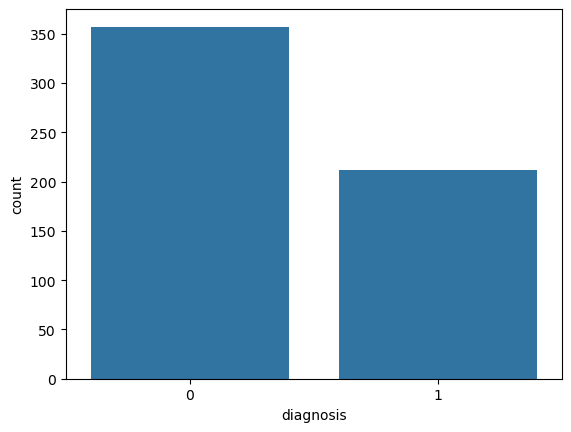

In [13]:
sns.barplot(c)

# This chart shows the number of B and M cases.
# B is much more than M, so the data is imbalanced.
# Imbalanced data can affect the model because it sees more B examples.

In [14]:
corr_matrix = data.corr()
corr_matrix

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<Axes: >

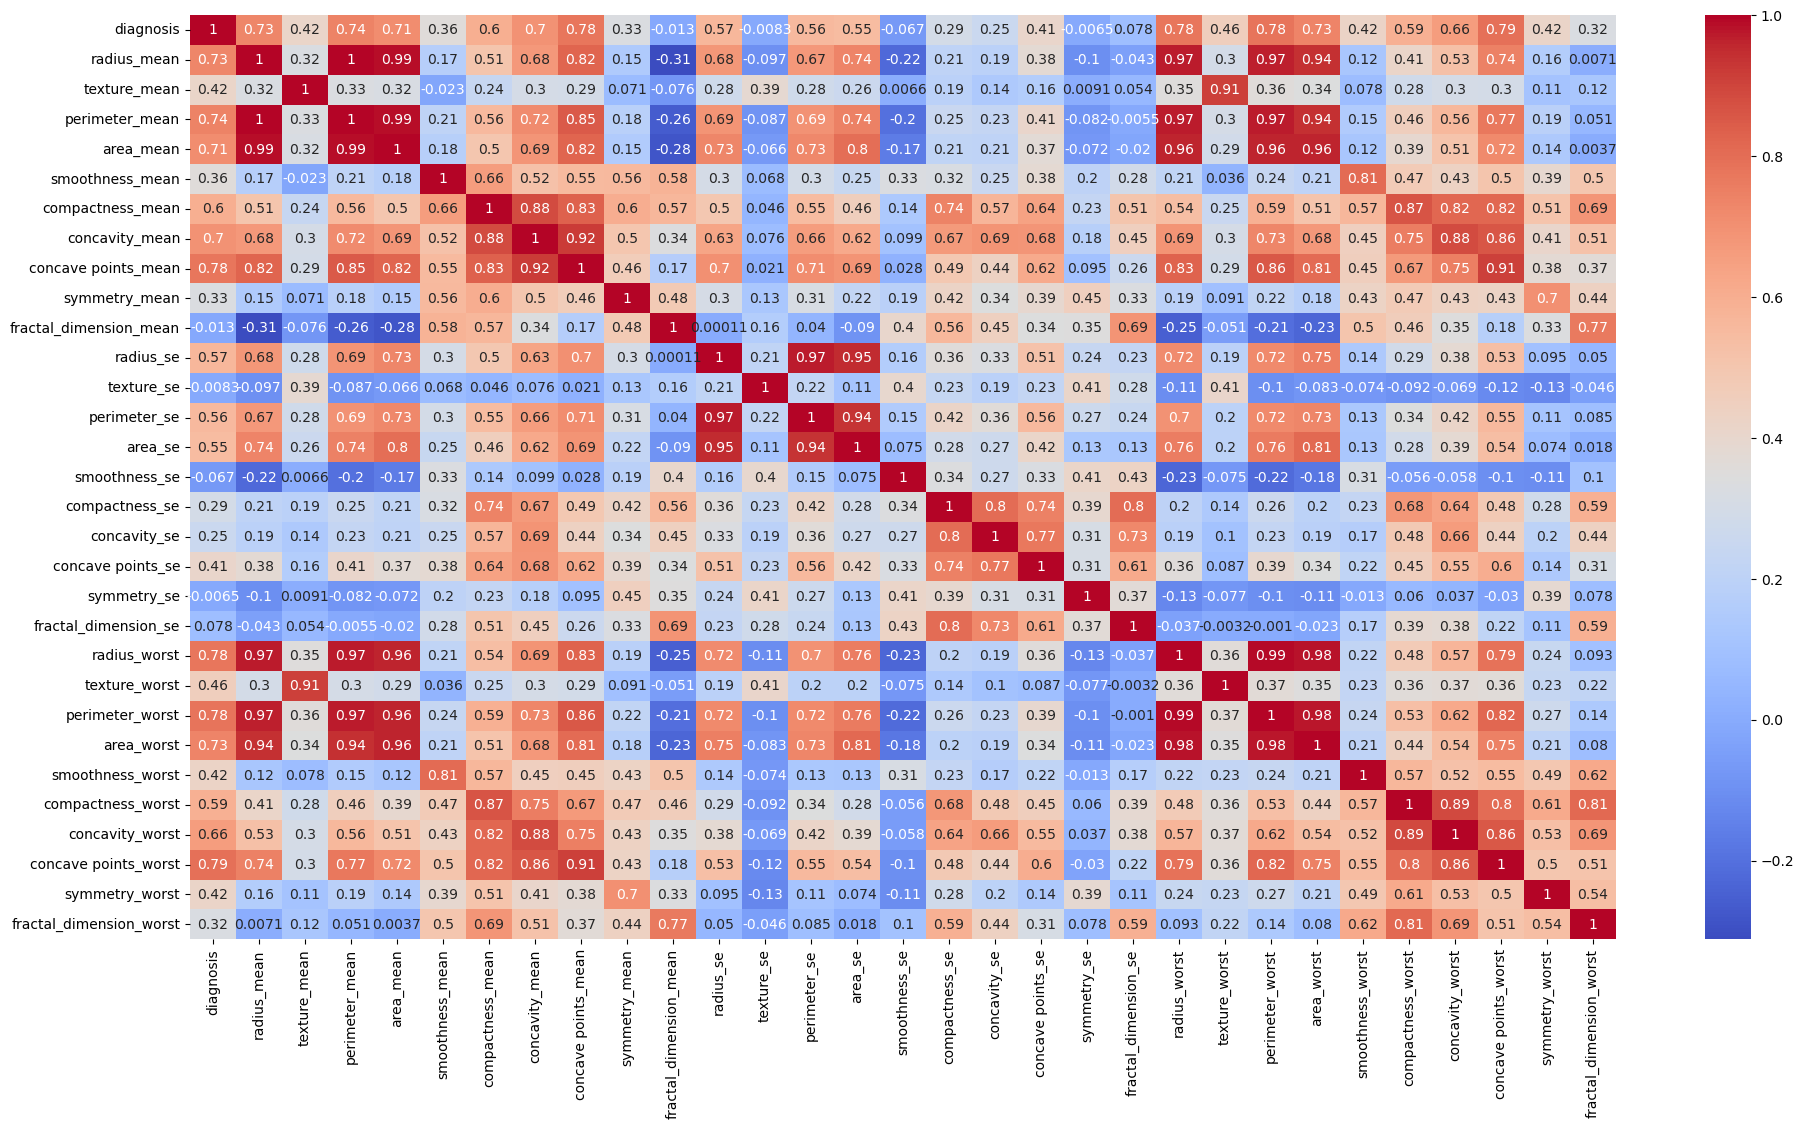

In [15]:
# ploting the heatmap on the basic of the correlation 
plt.figure(figsize=(23,12))
sns.heatmap(corr_matrix, cmap="coolwarm",annot=True)

# The heatmap shows strong positive correlation between tumor size features
# (radius_mean, area_mean, perimeter_mean) and the diagnosis. 
# These features increase when the tumor is malignant.
# Many features are highly correlated with each other, indicating redundancy.
# Texture-related features have lower correlation, meaning weaker contribution.
# This helps identify important features for building a better ML model.


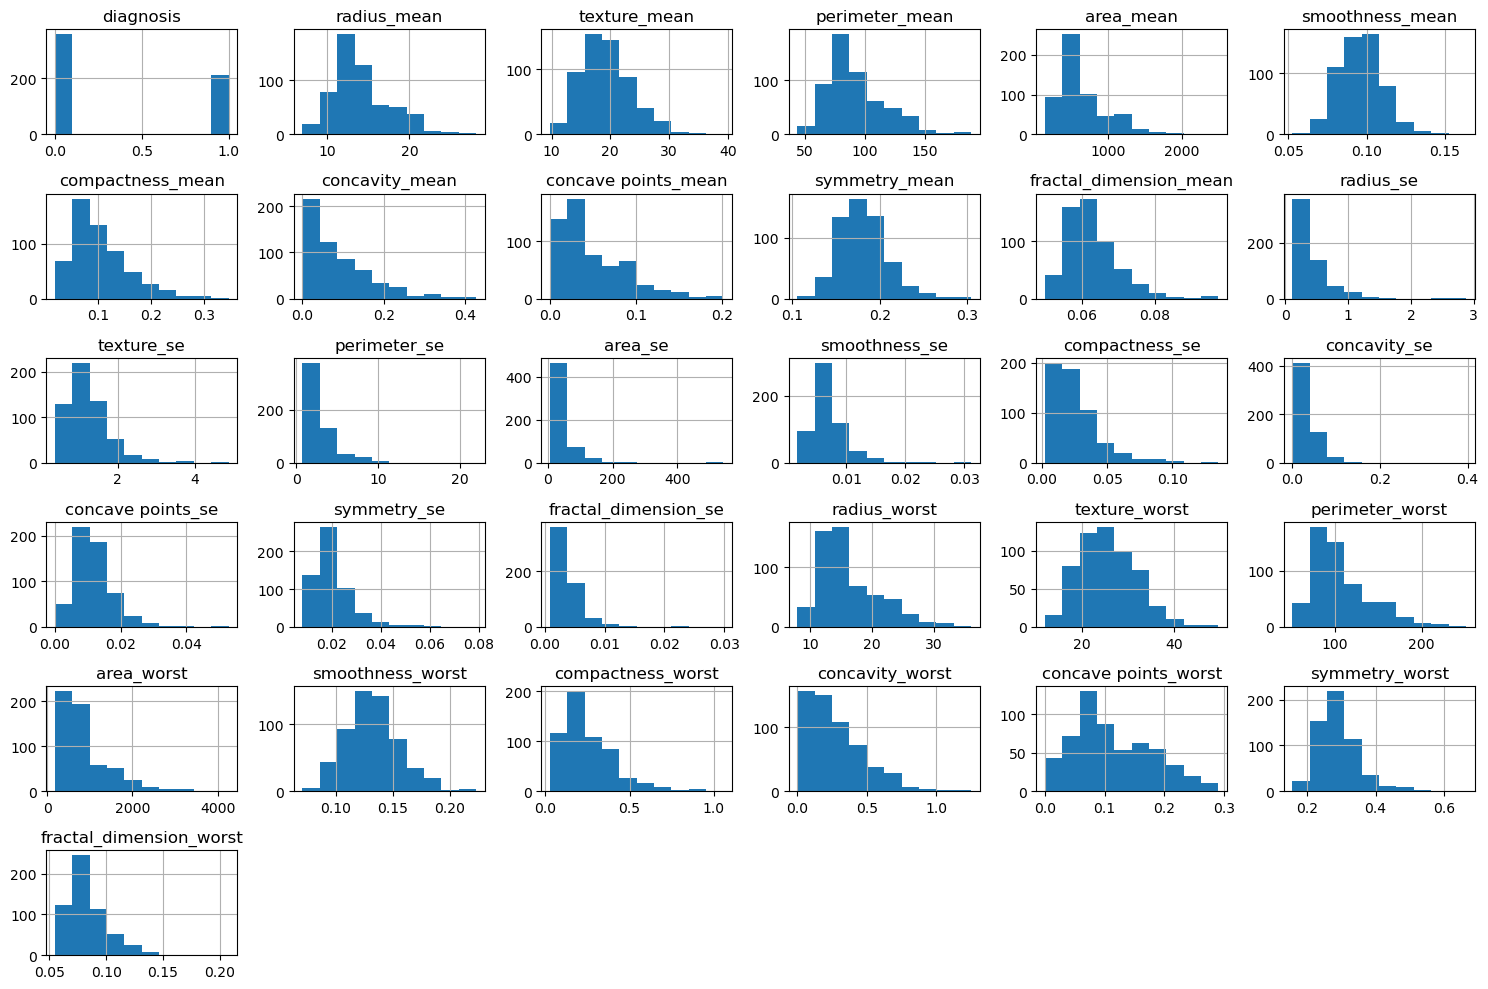

In [16]:
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Many features show a clear separation between benign and malignant groups
# Some features are right-skewed

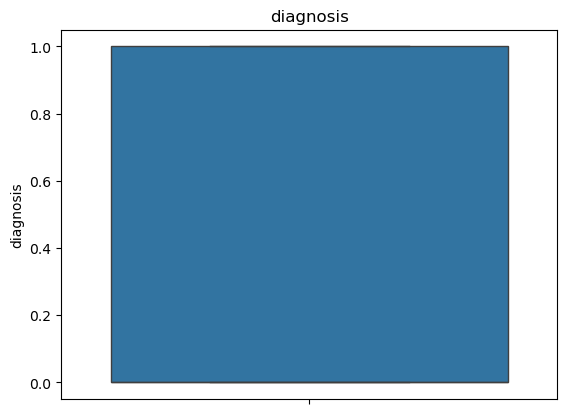

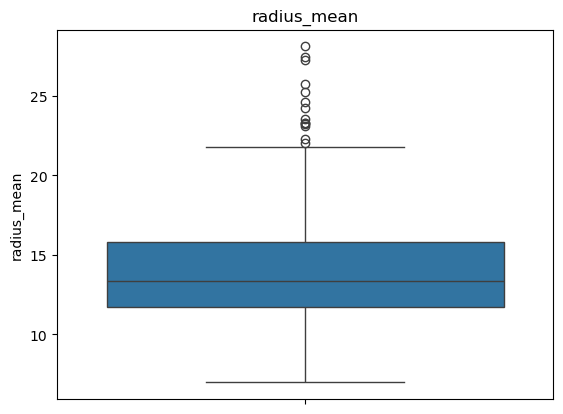

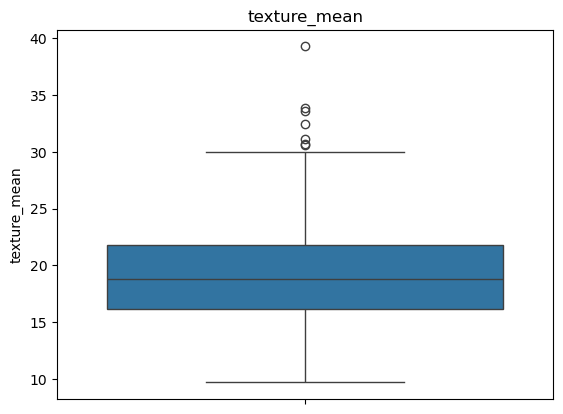

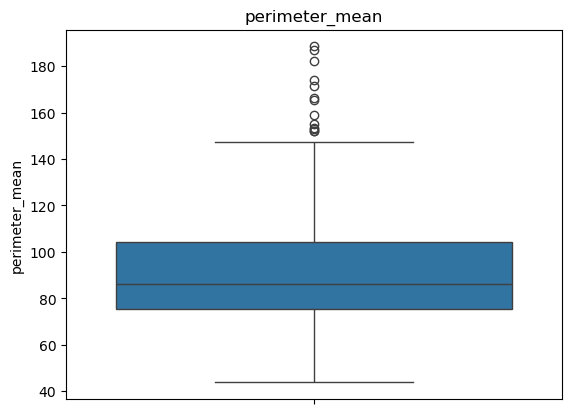

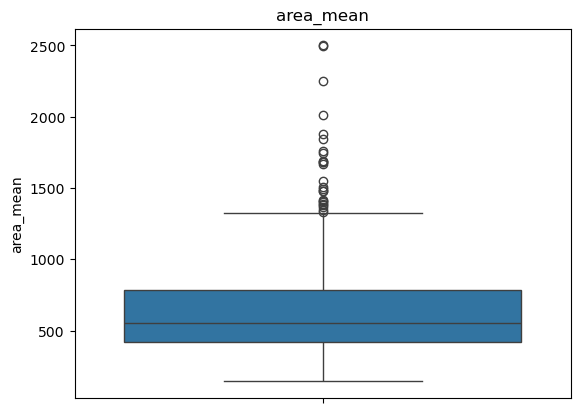

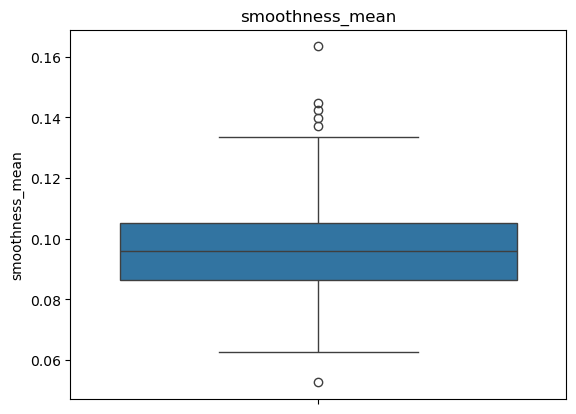

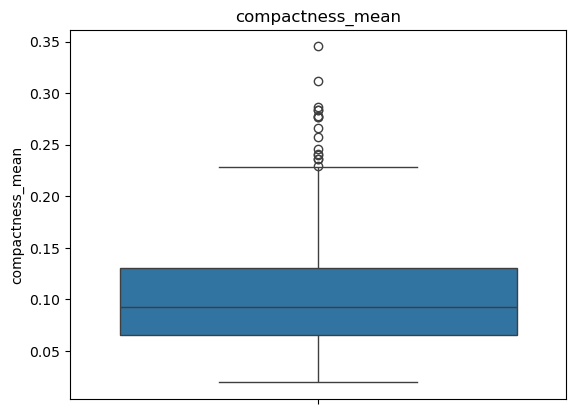

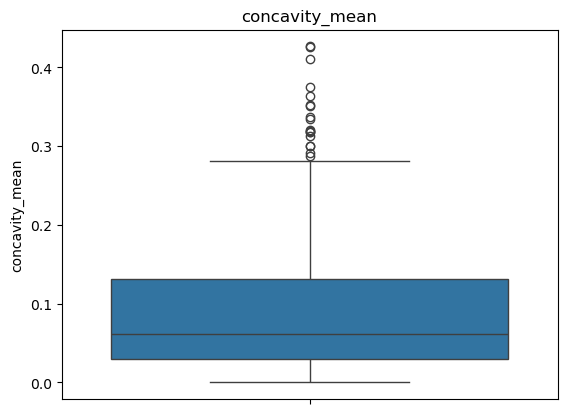

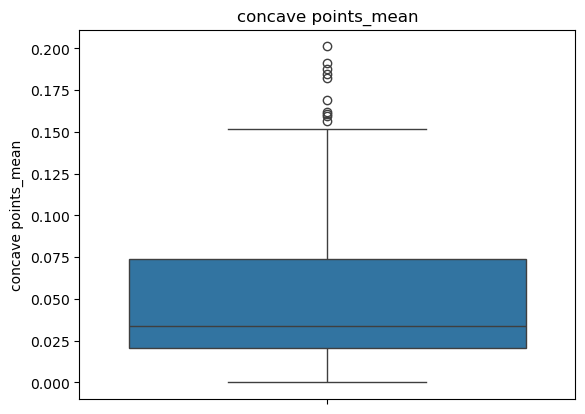

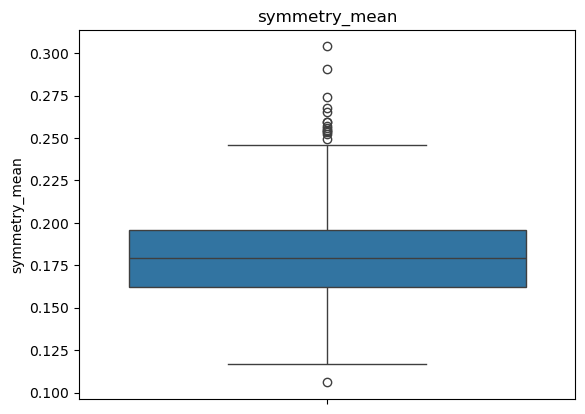

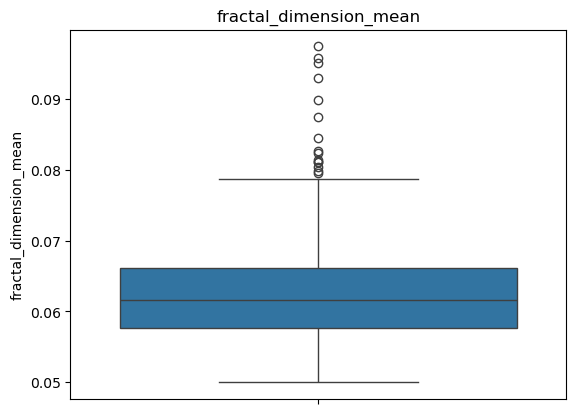

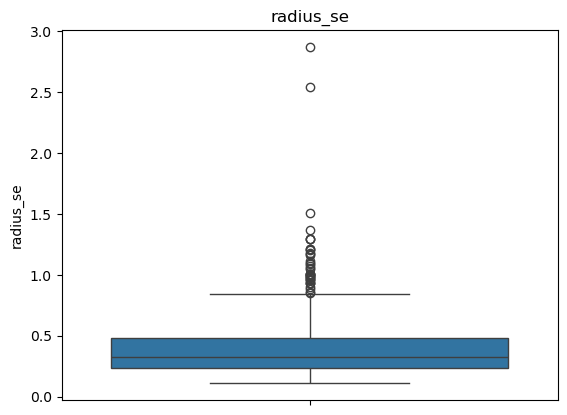

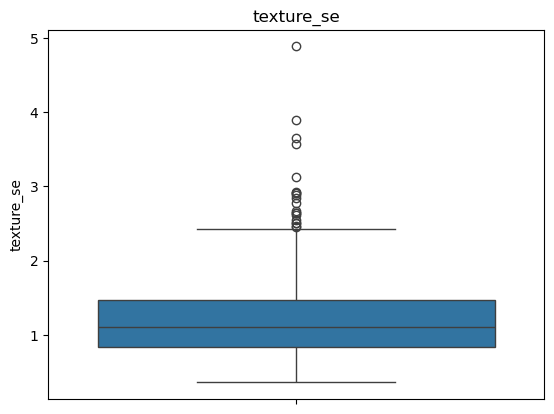

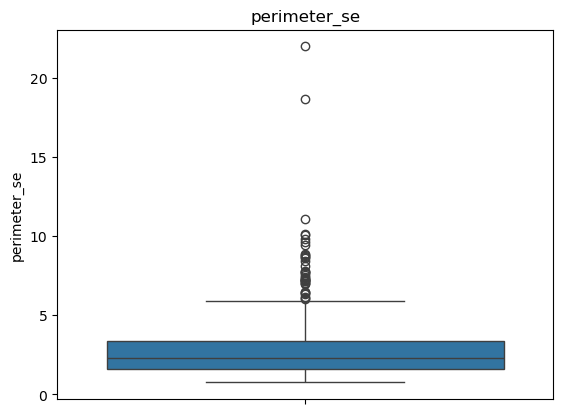

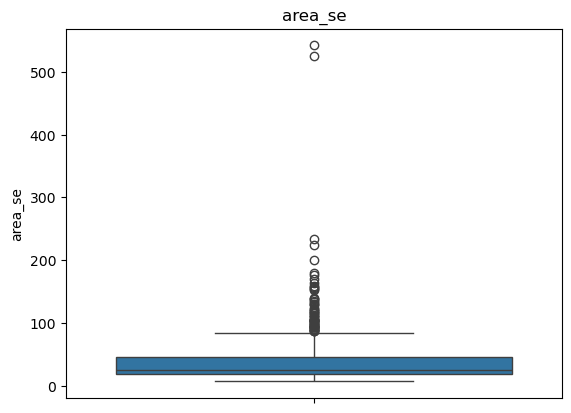

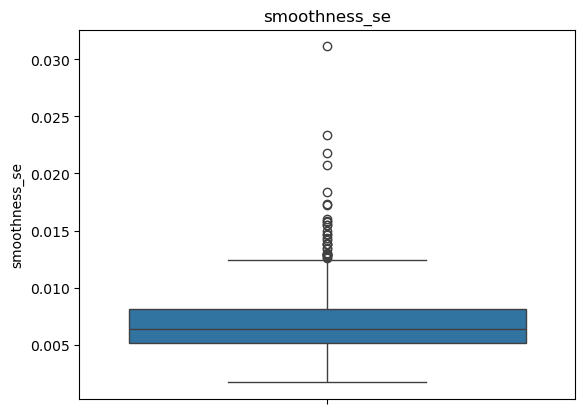

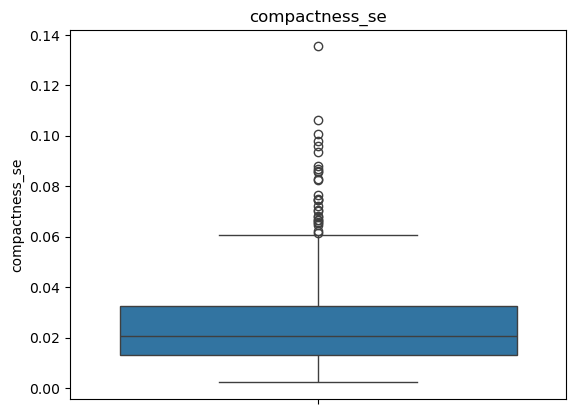

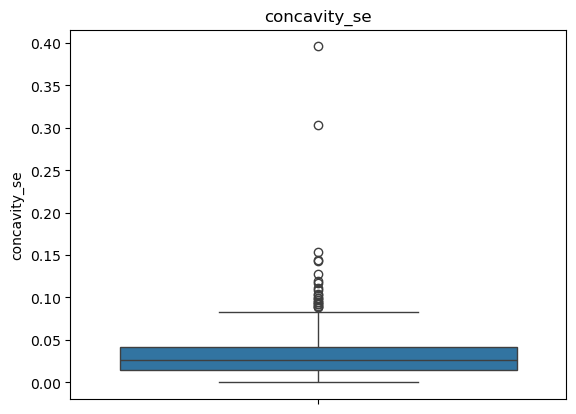

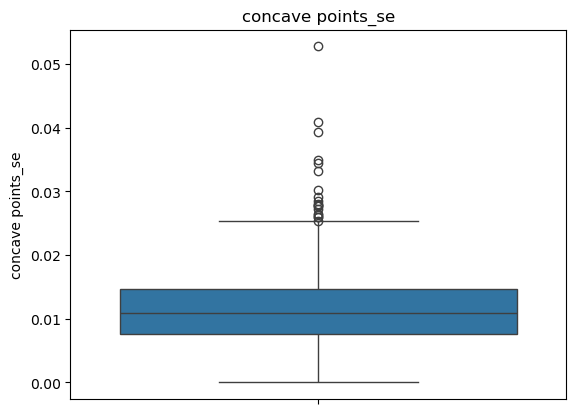

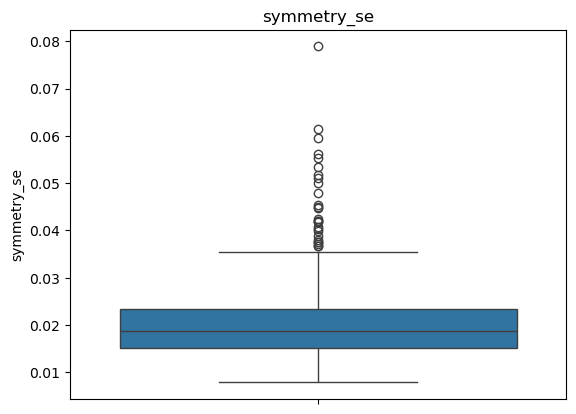

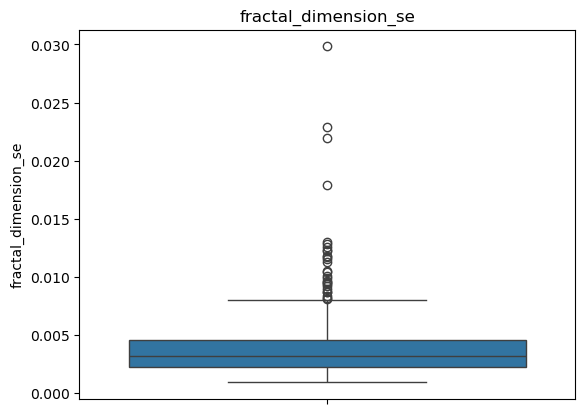

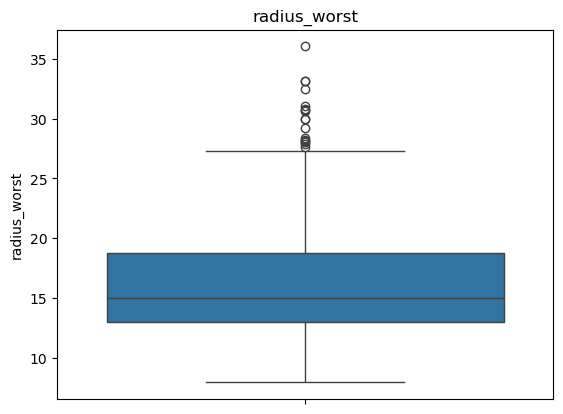

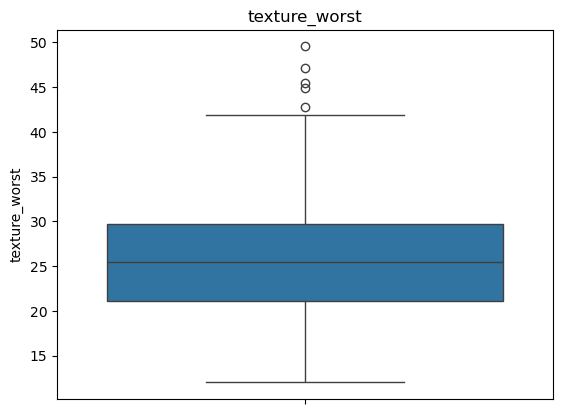

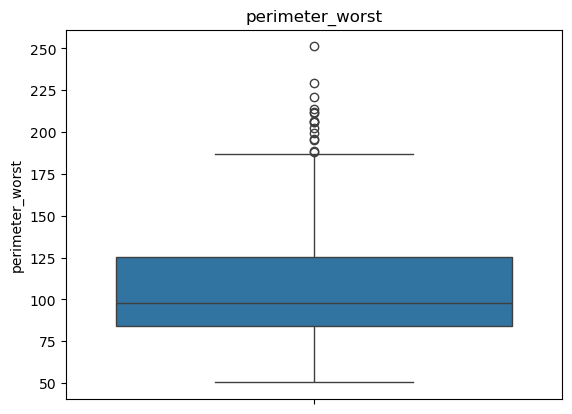

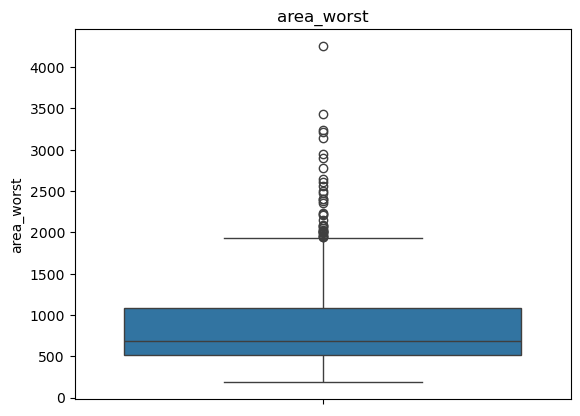

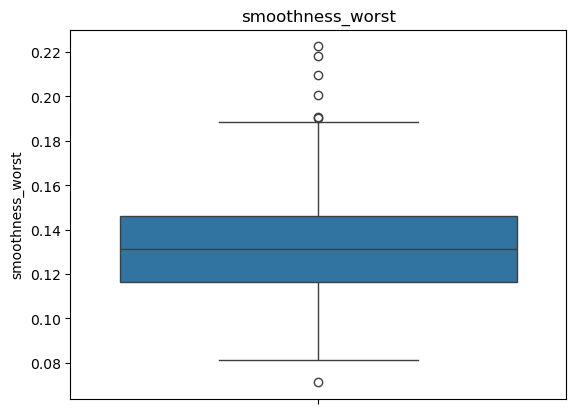

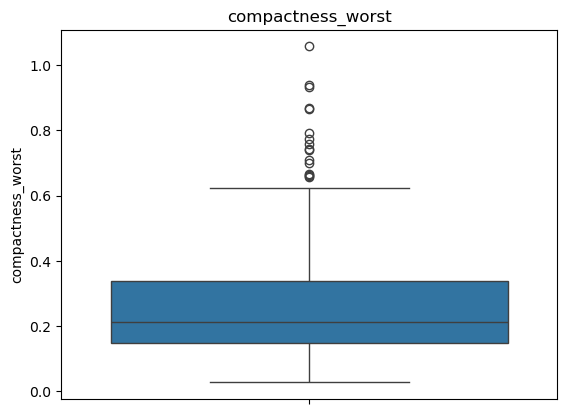

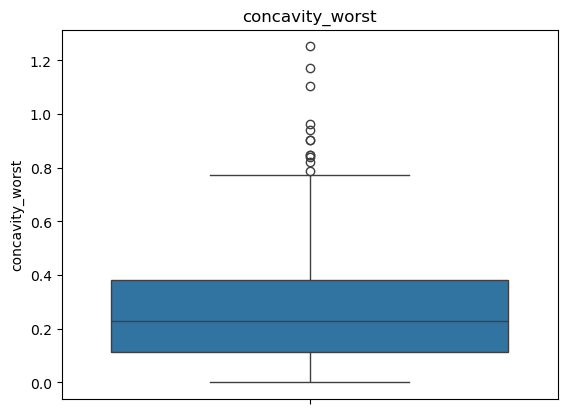

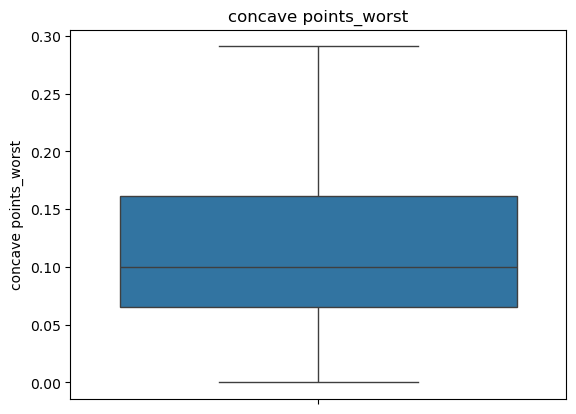

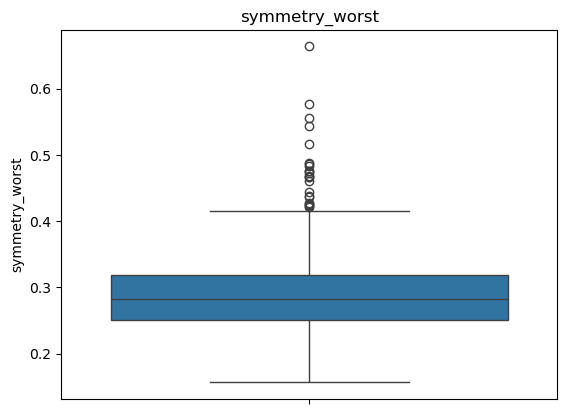

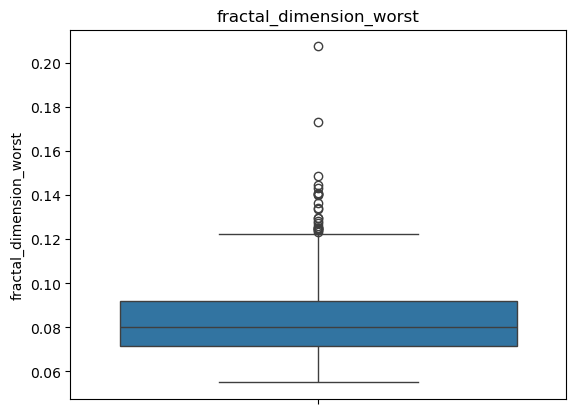

In [17]:
# ploting the boxplot for each col
for col in data.columns:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

## Finding so much outiler exclude concave points_worst column

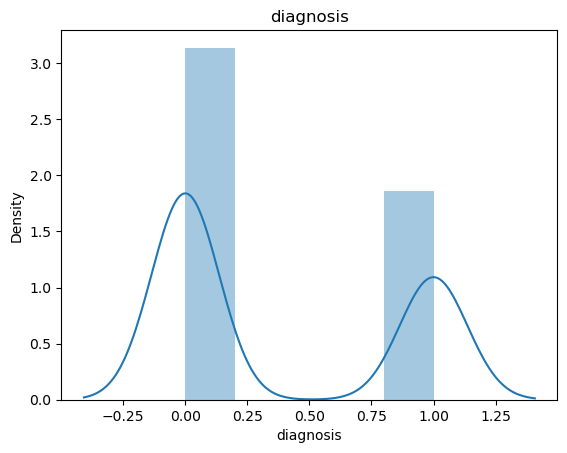

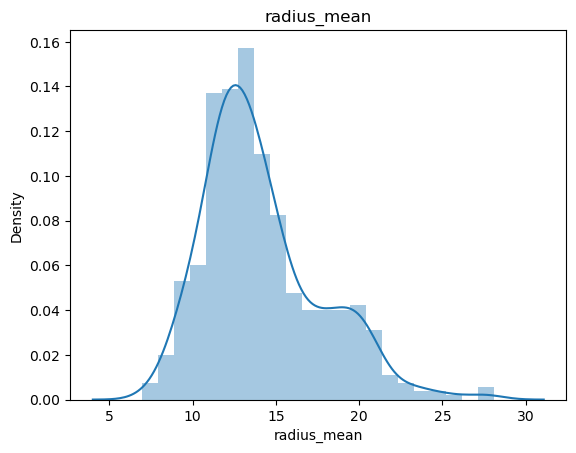

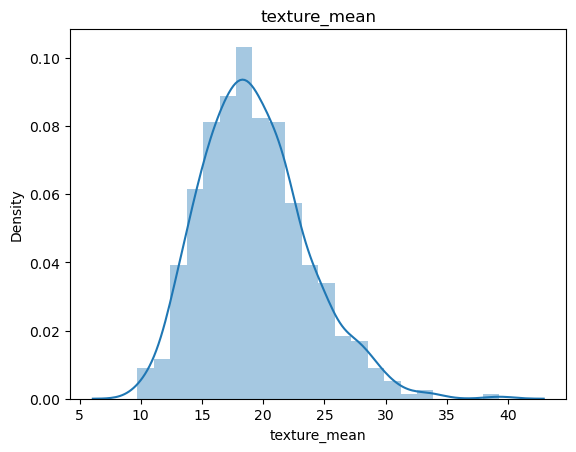

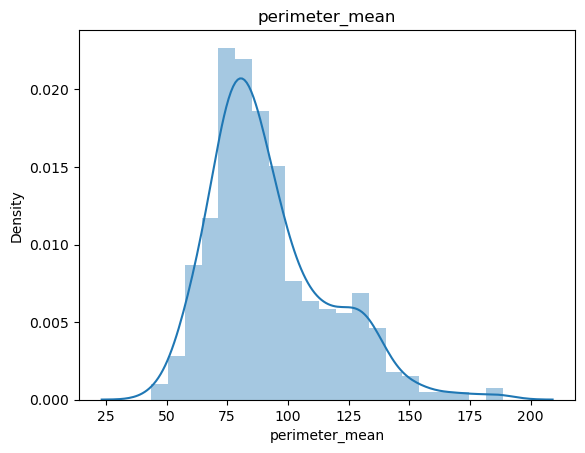

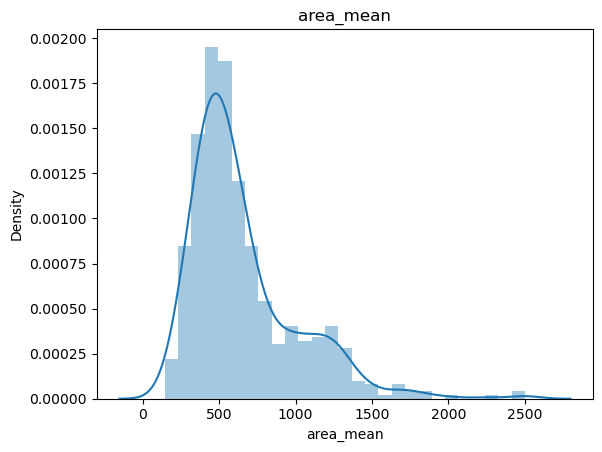

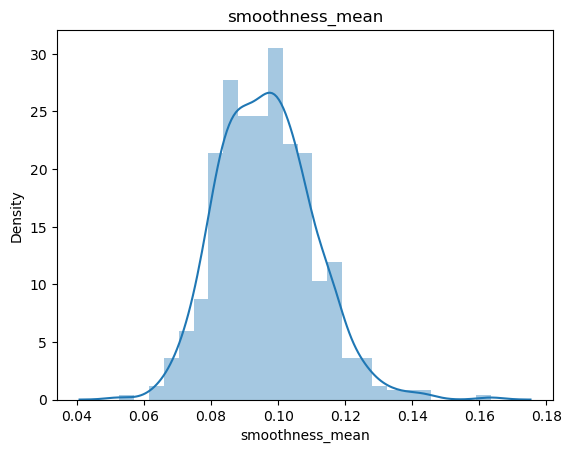

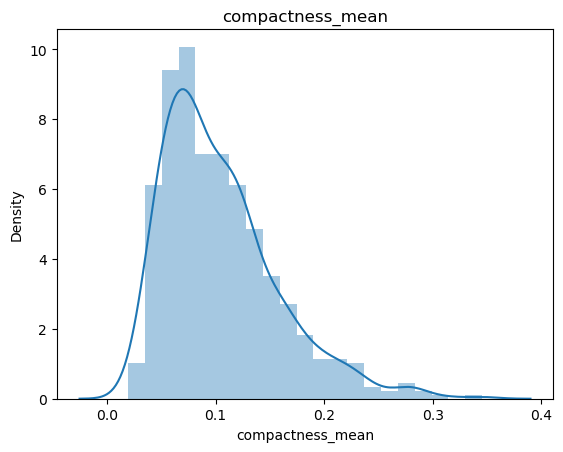

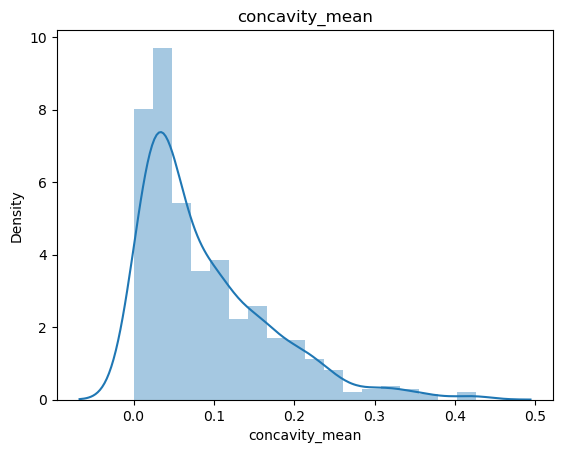

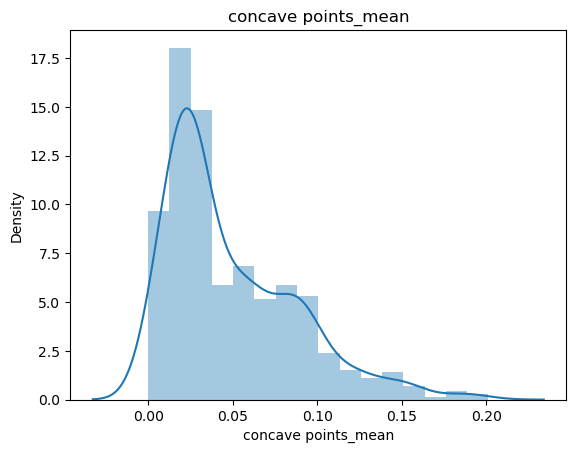

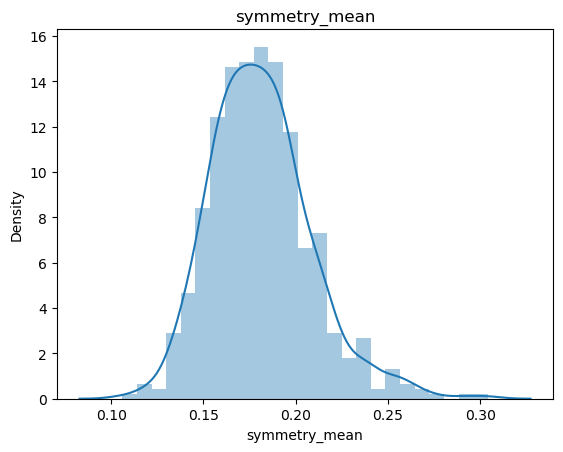

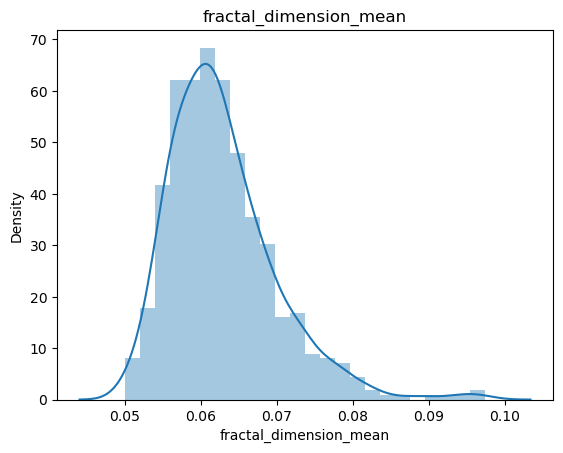

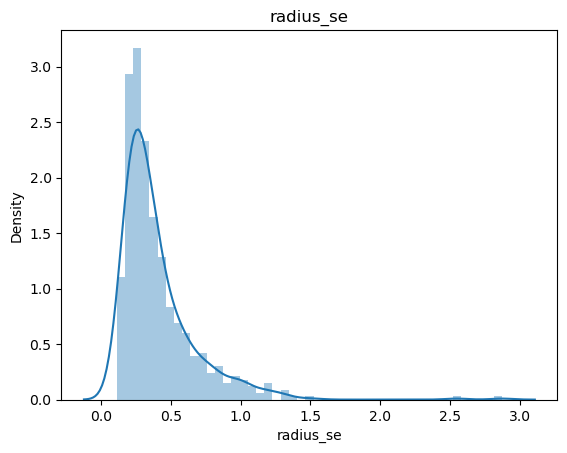

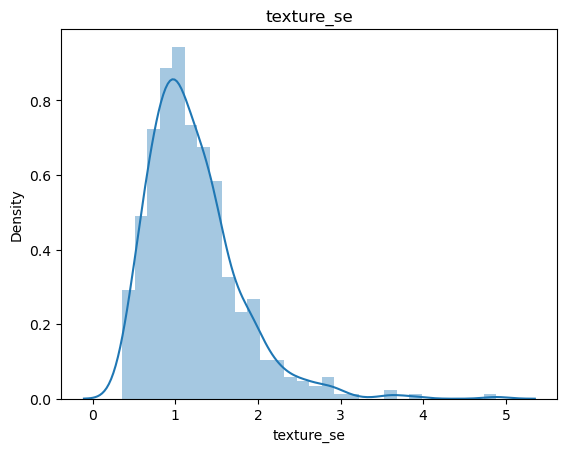

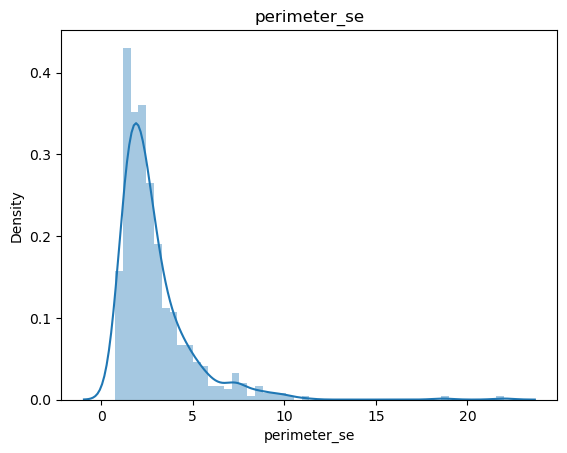

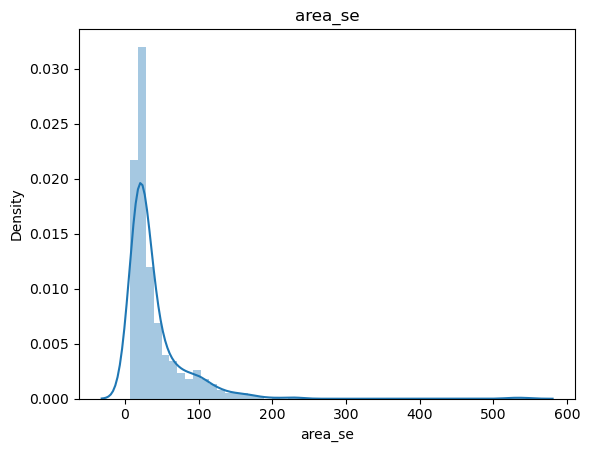

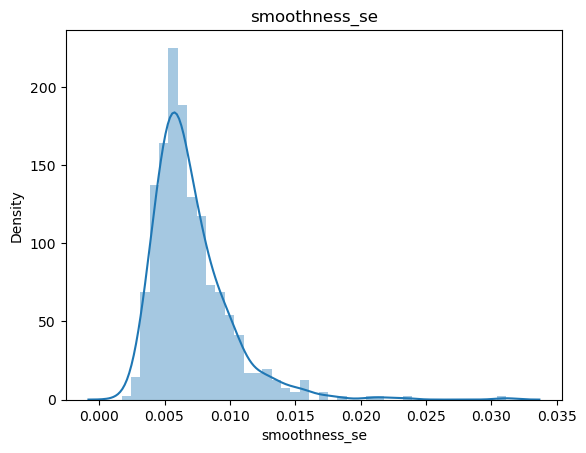

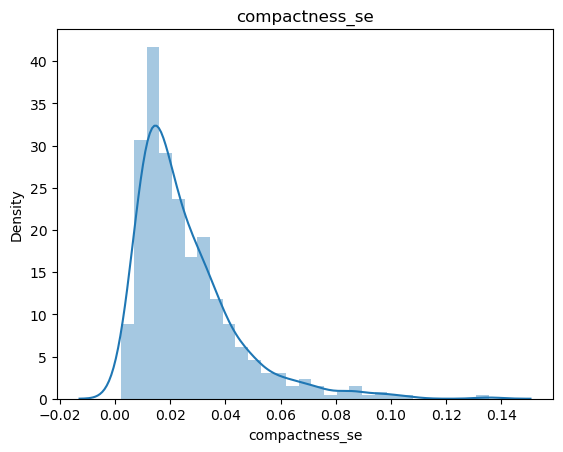

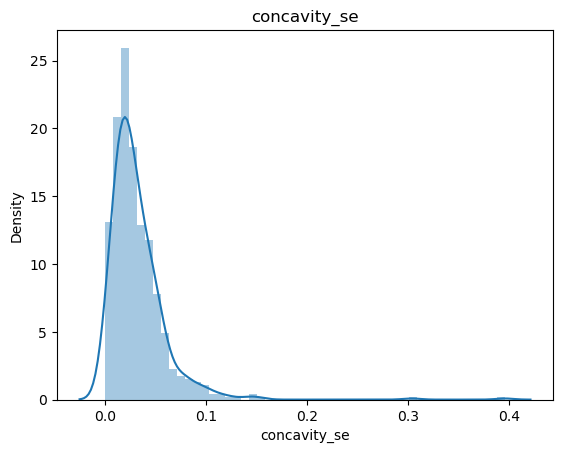

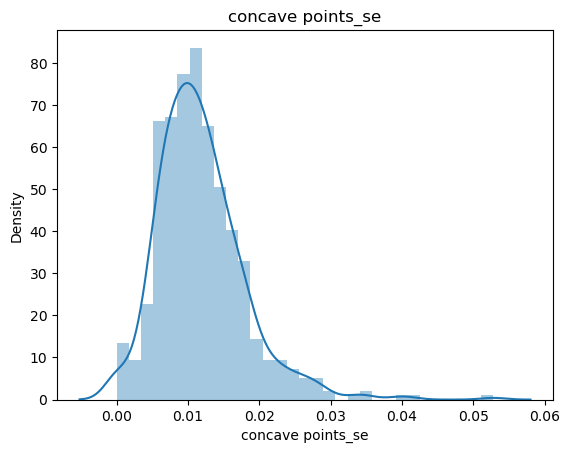

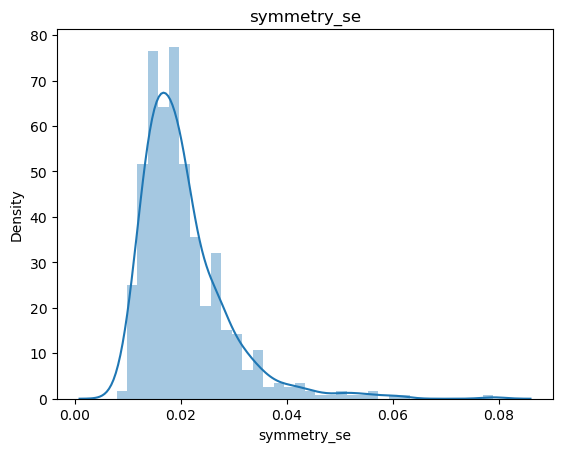

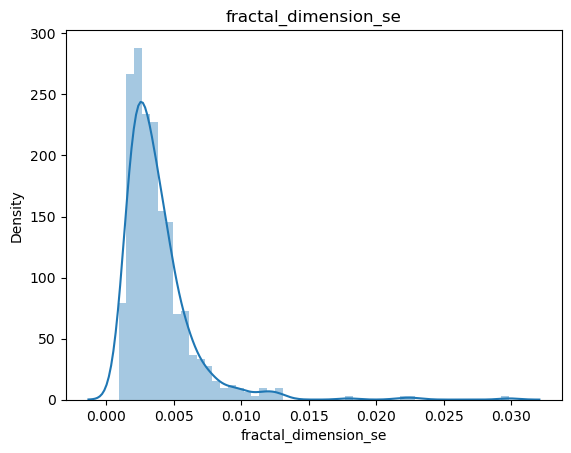

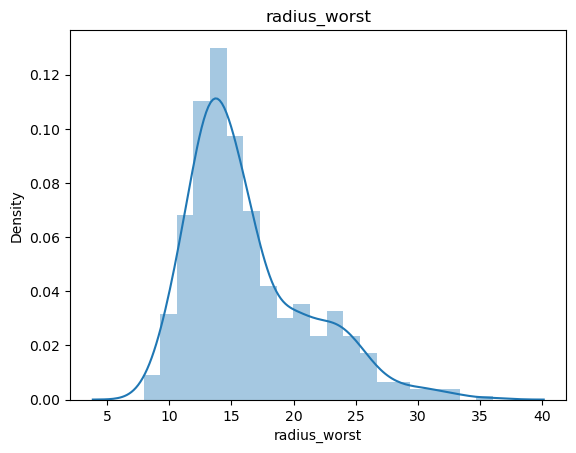

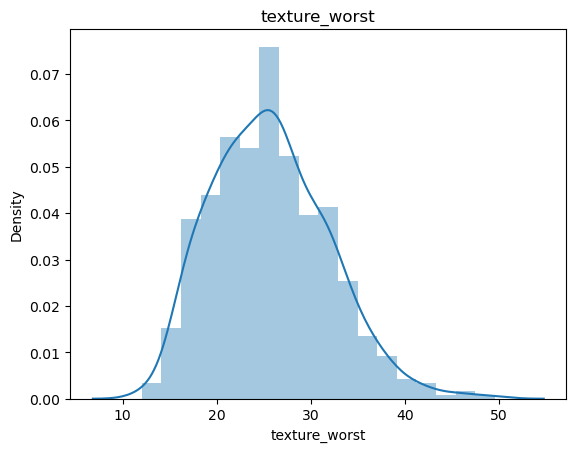

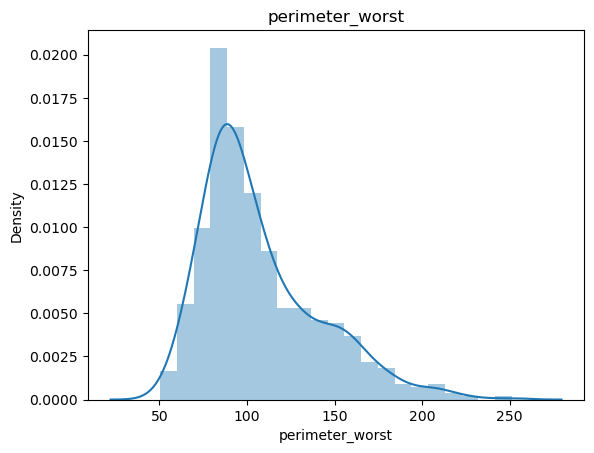

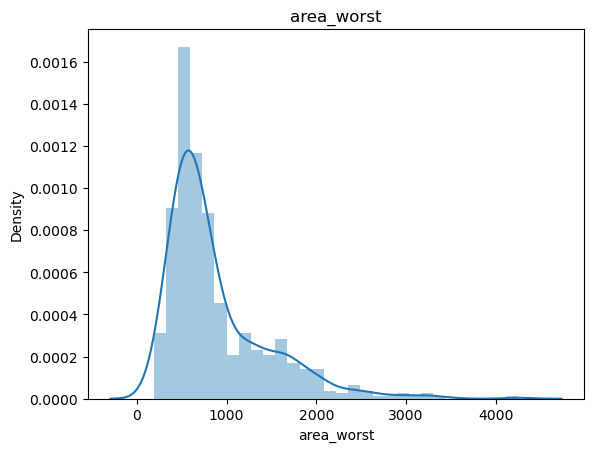

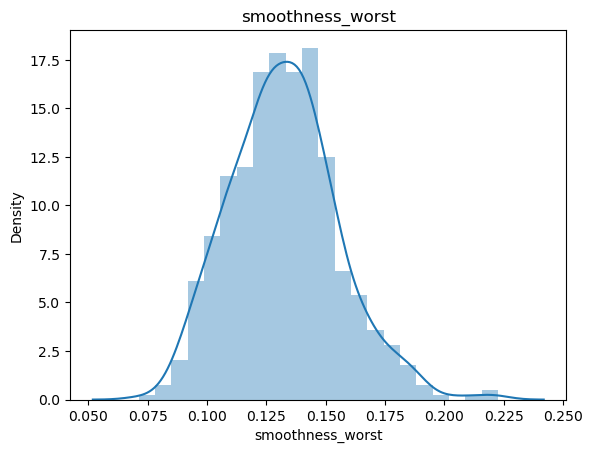

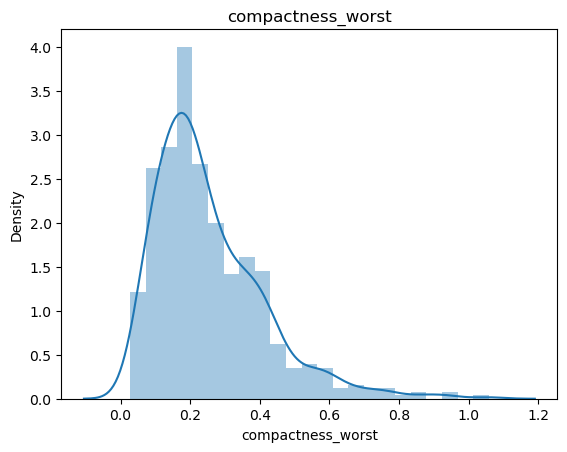

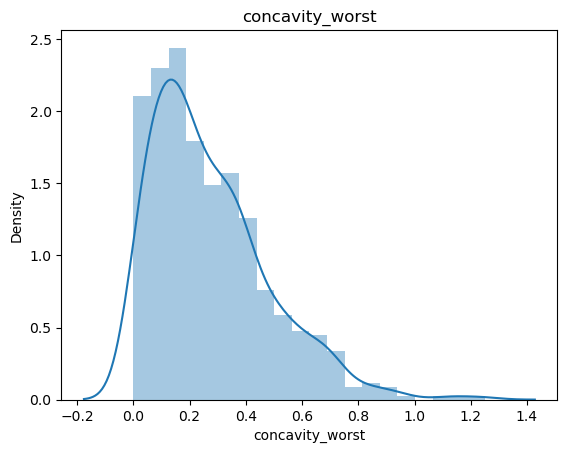

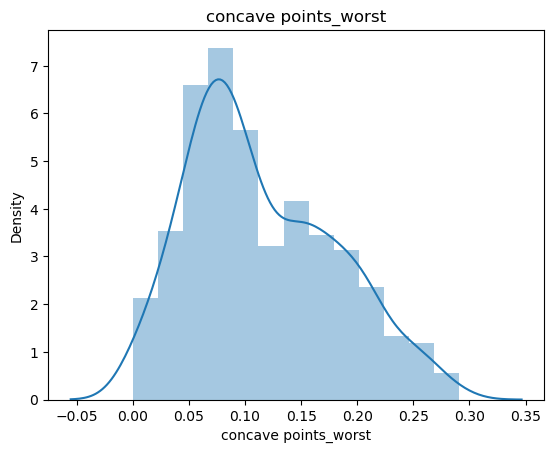

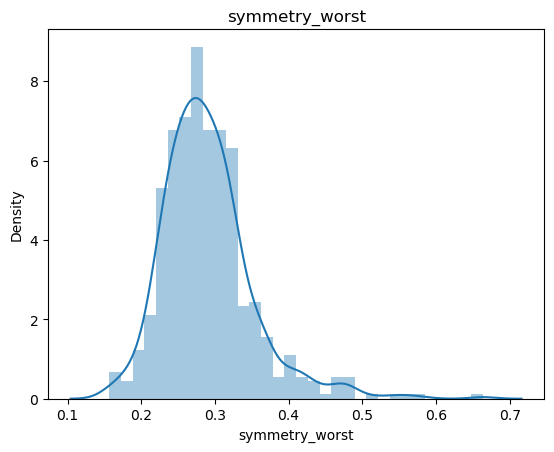

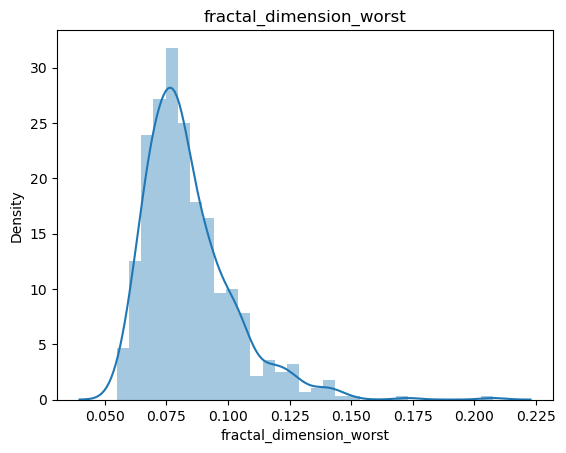

In [18]:
import warnings
warnings.filterwarnings("ignore")
for col in data.columns:
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

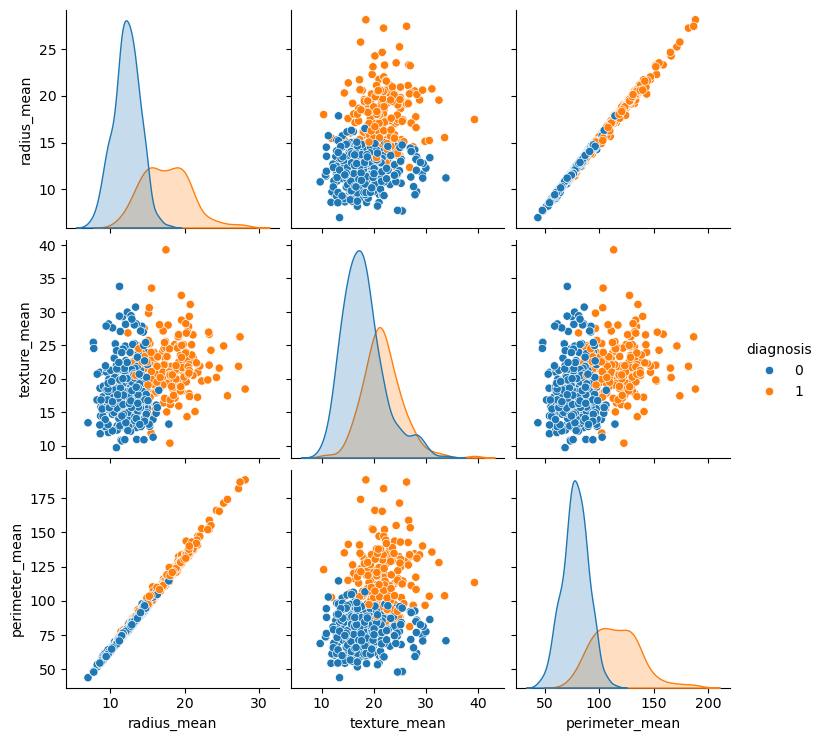

In [20]:
sns.pairplot(data[['radius_mean','texture_mean','perimeter_mean','diagnosis']], hue='diagnosis')

In [21]:
cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]


In [22]:
def iqr_range(col):
    # Calculate the first and third quartiles of the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    # Values below are set to lower_bound, above are set to upper_bound
    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )

In [23]:
def Z_score(col):
    # Define the upper and lower bounds using Z-score method (±3 standard deviations from mean)
    upper_bound = data[col].mean() + 3 * data[col].std()
    lower_bound = data[col].mean() - 3 * data[col].std()
    
    # Cap values outside the Z-score range
    # Values below the lower bound are set to lower_bound
    # Values above the upper bound are set to upper_bound
    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )

In [24]:
# Removing the outiler from each col
for i in cols:
    iqr_range(i)

Z_score("concave points_worst")

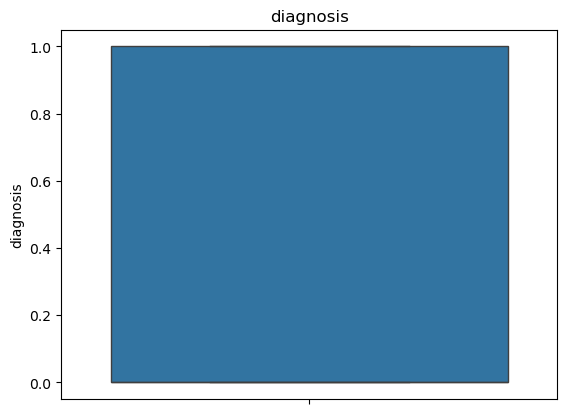

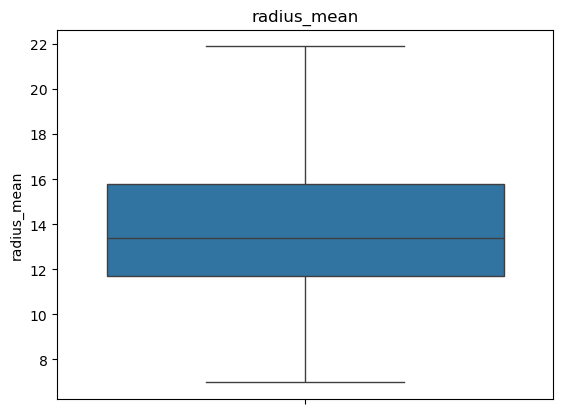

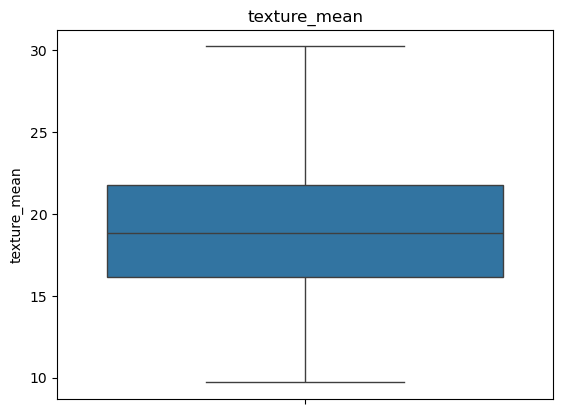

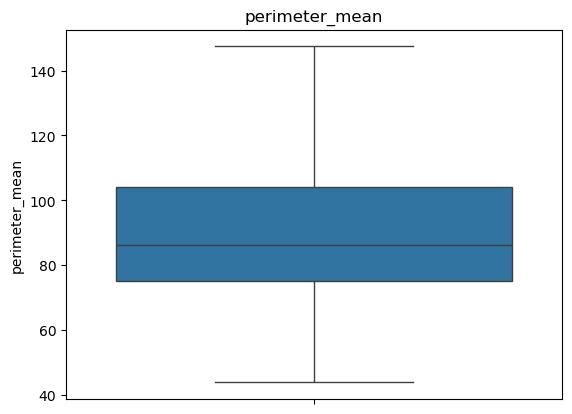

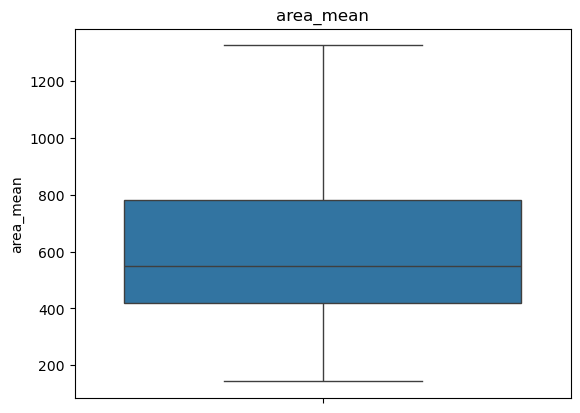

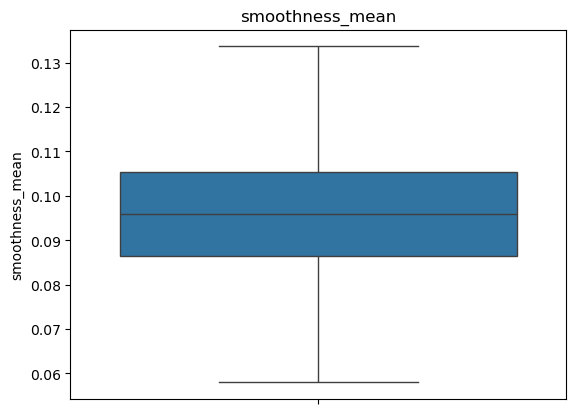

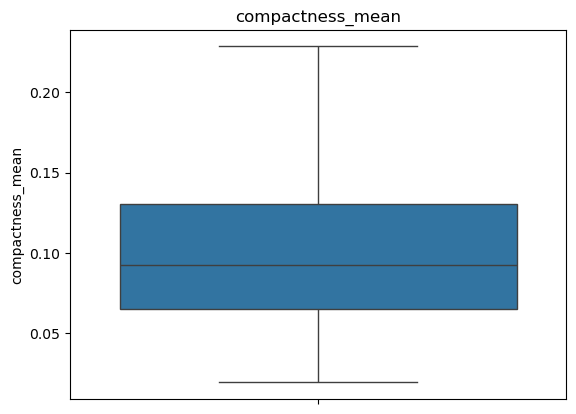

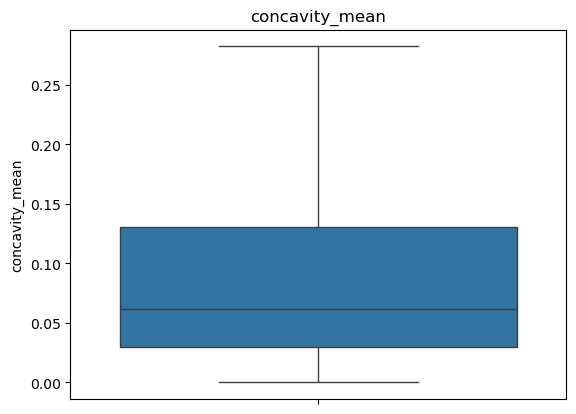

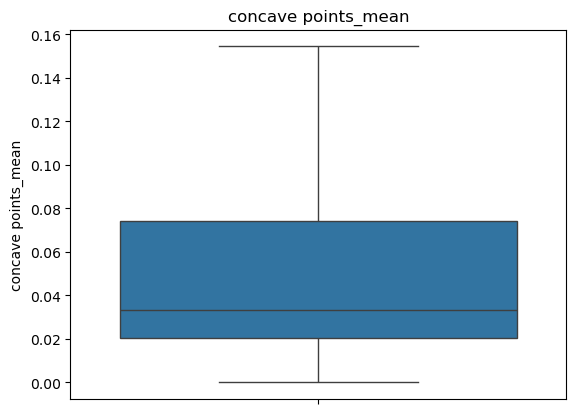

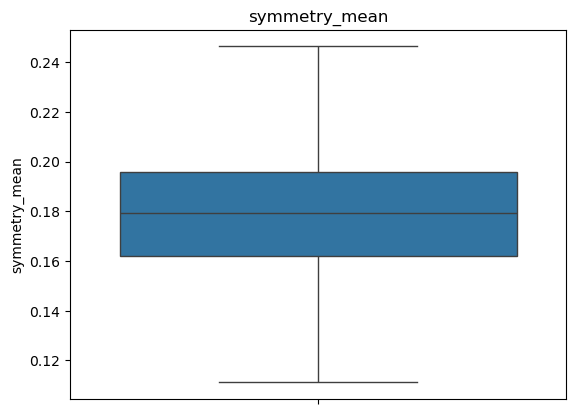

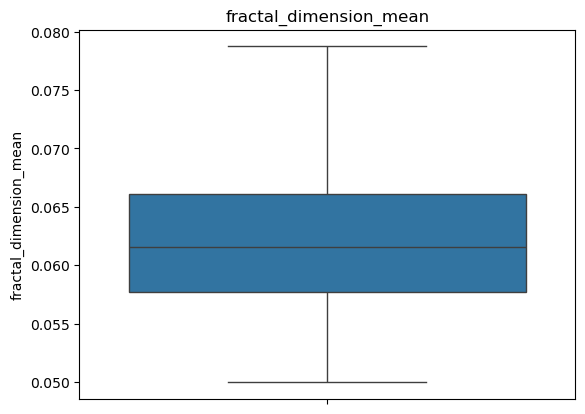

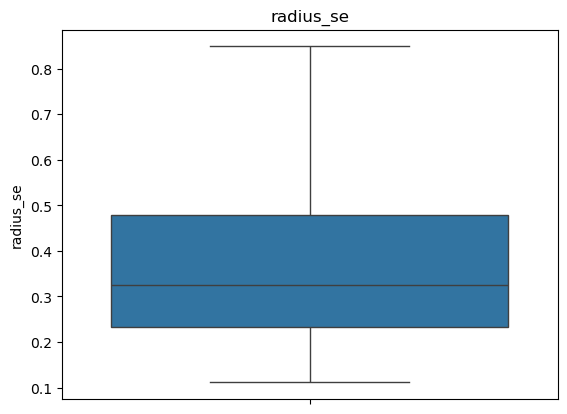

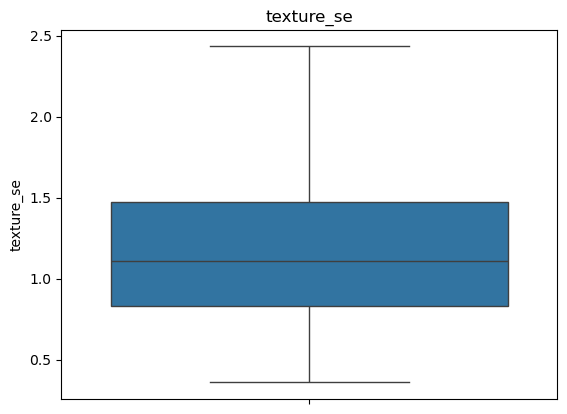

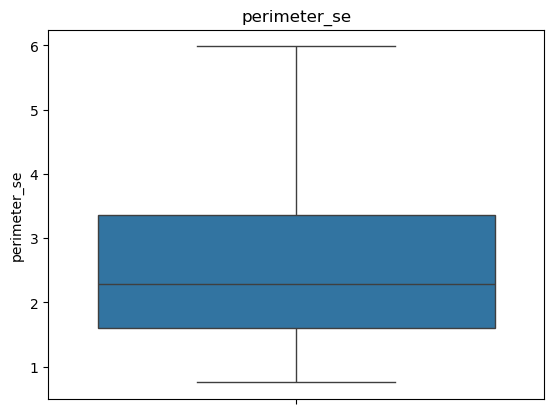

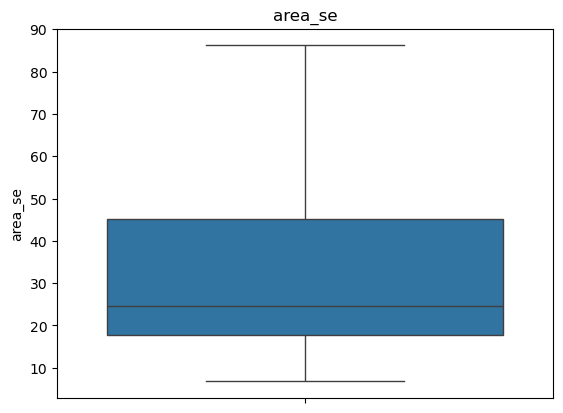

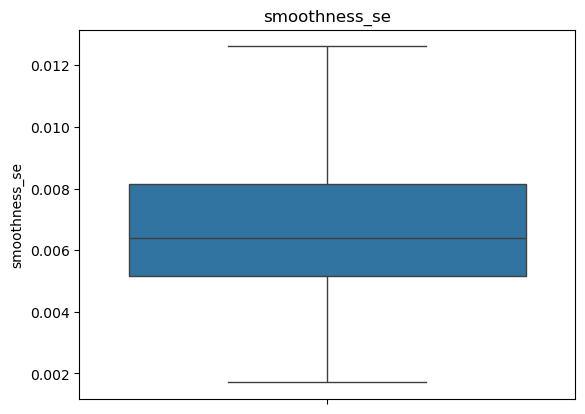

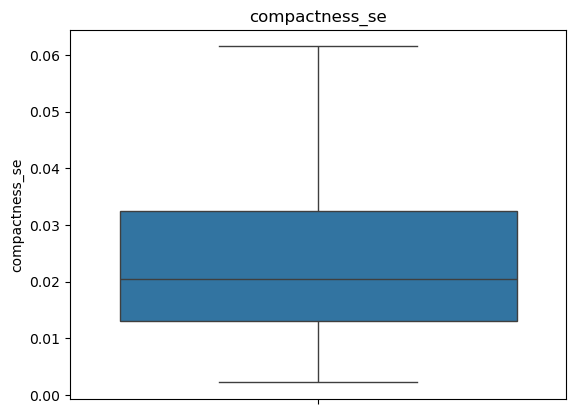

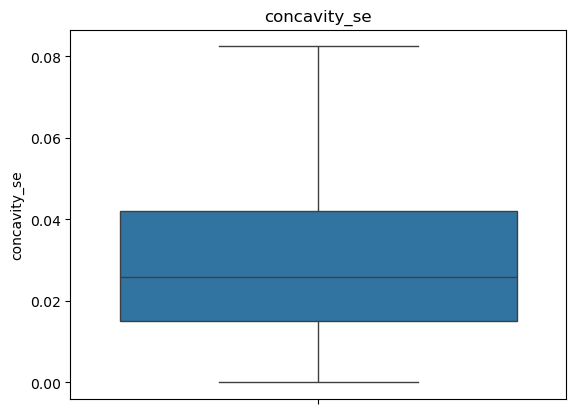

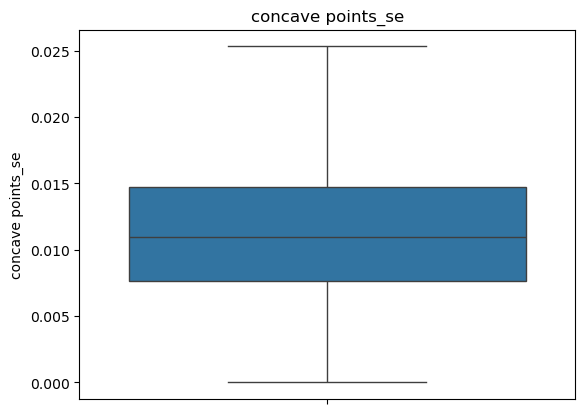

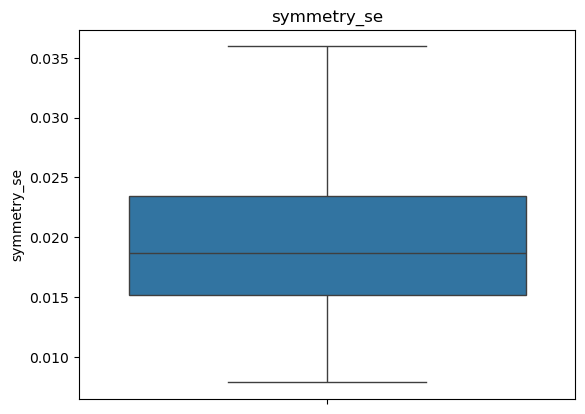

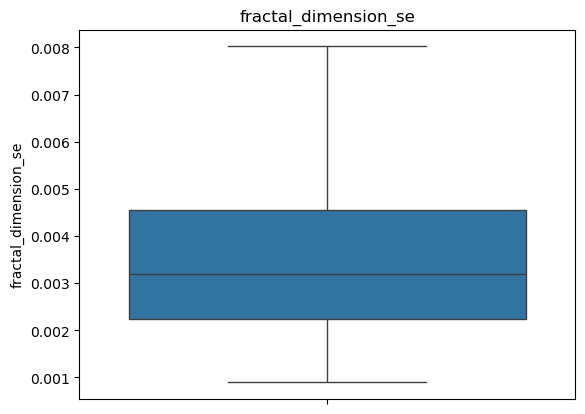

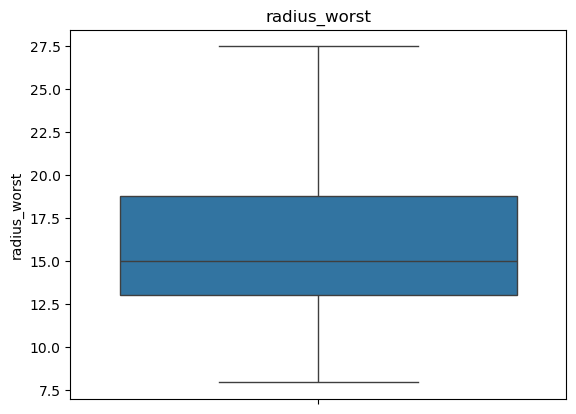

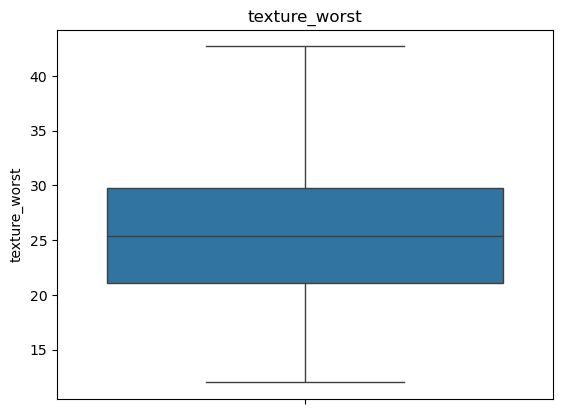

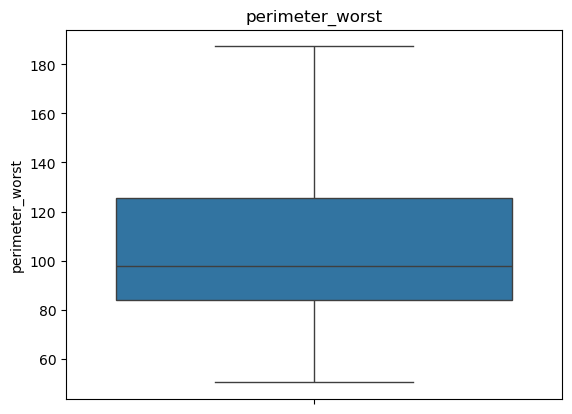

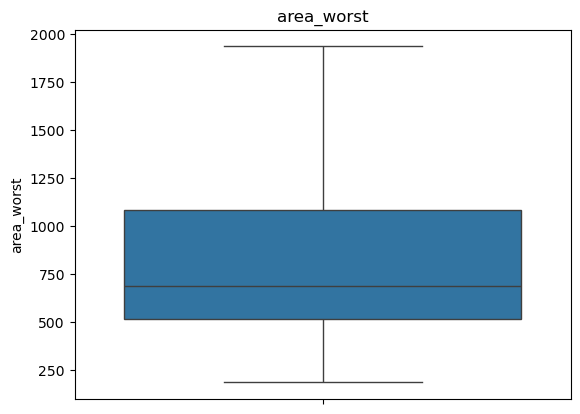

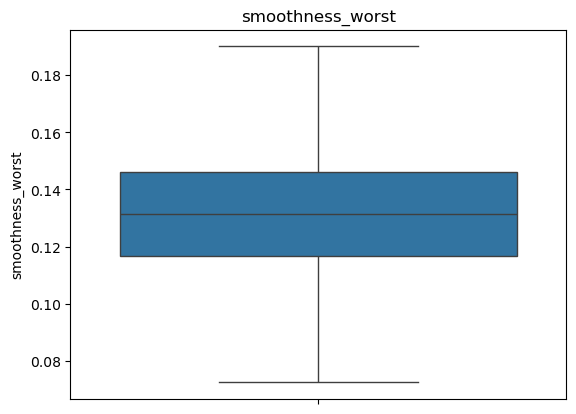

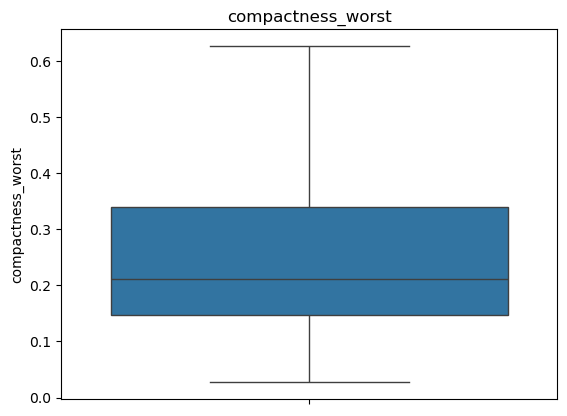

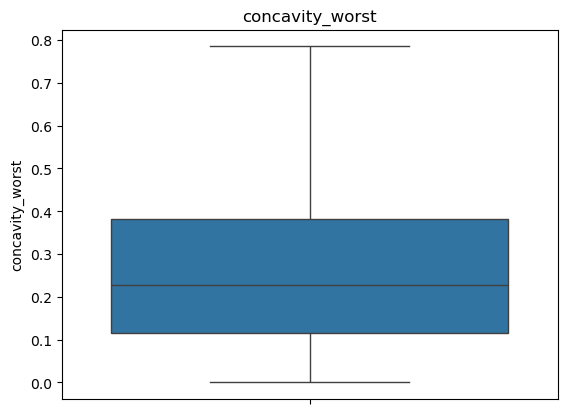

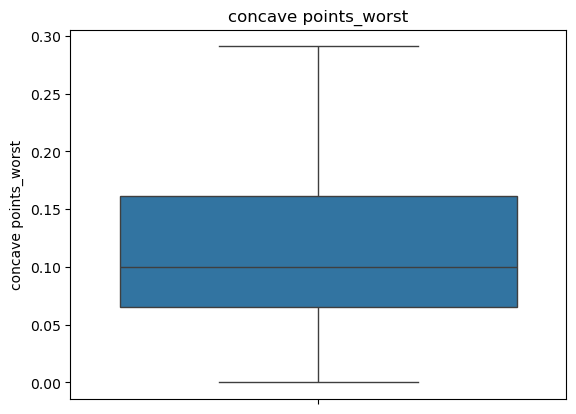

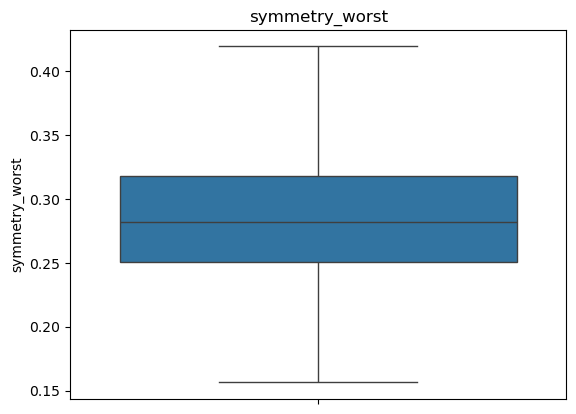

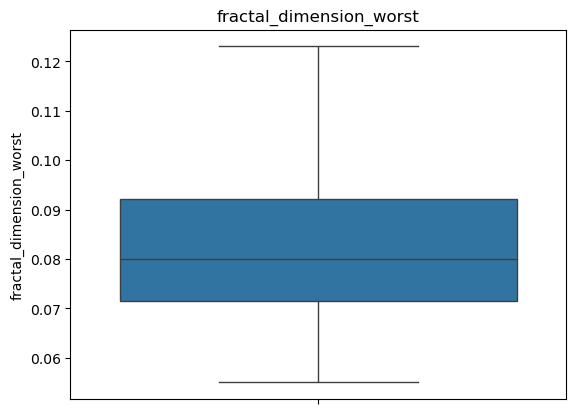

In [25]:
# ploting the boxplot for each col
for col in data.columns:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

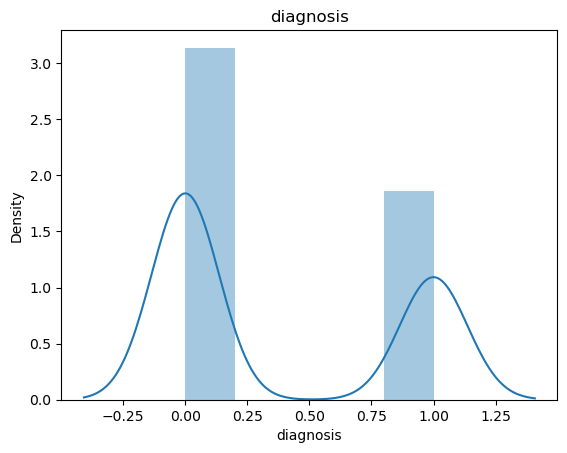

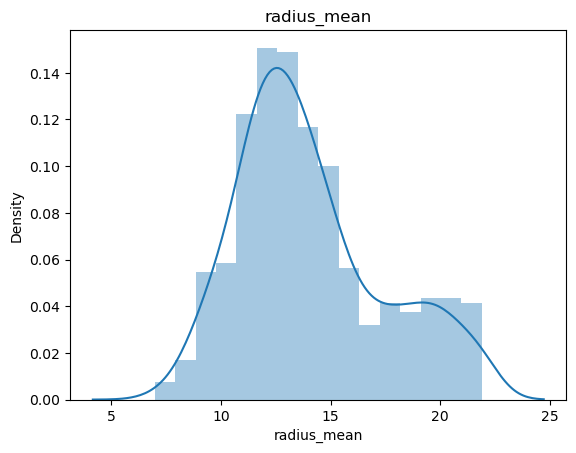

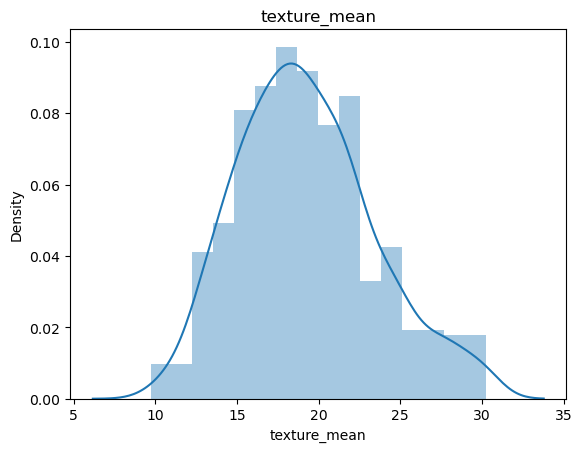

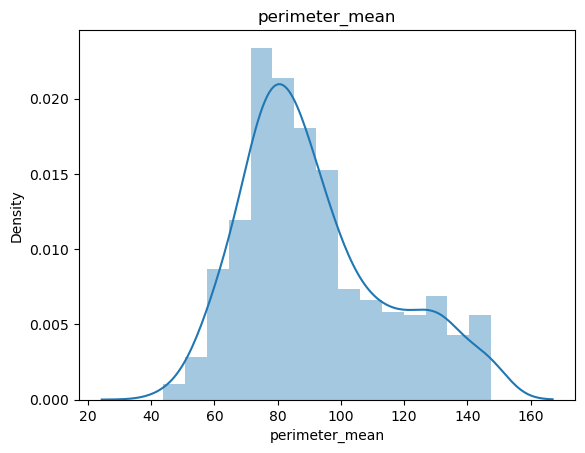

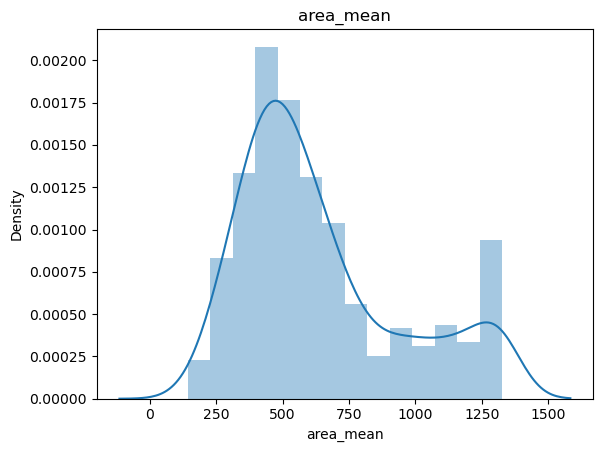

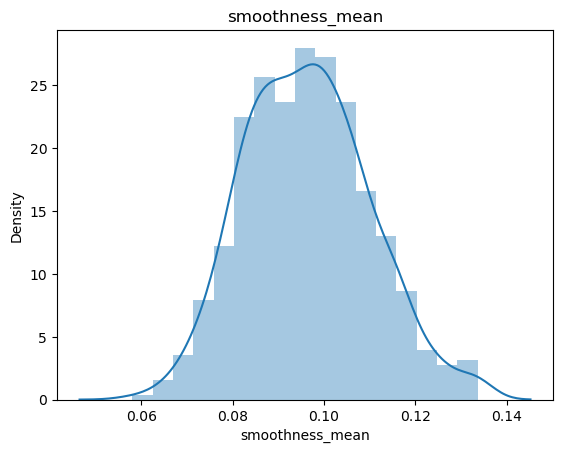

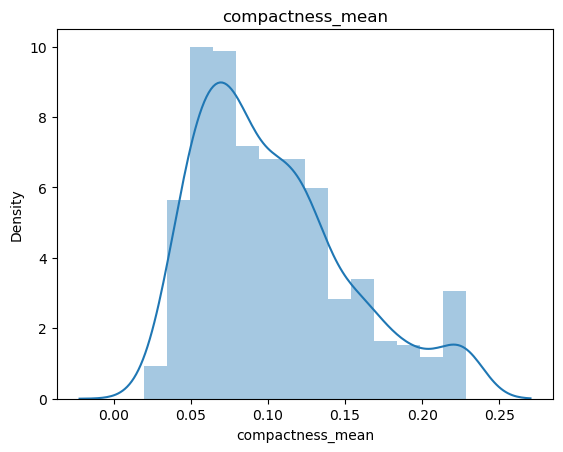

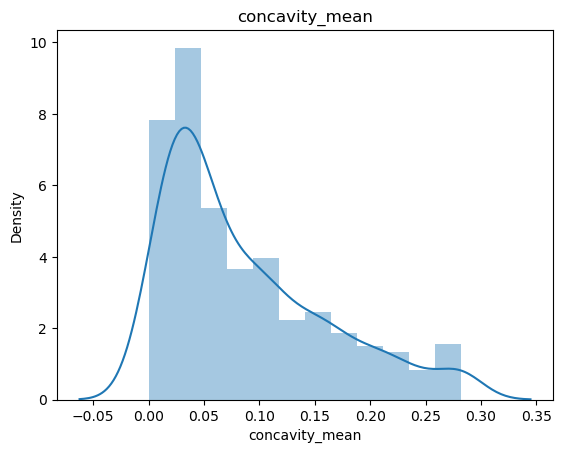

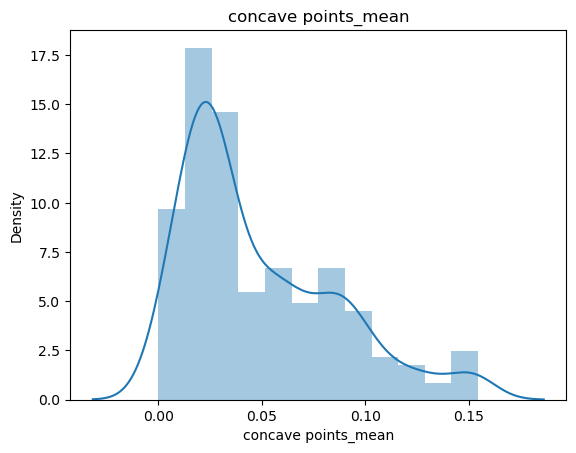

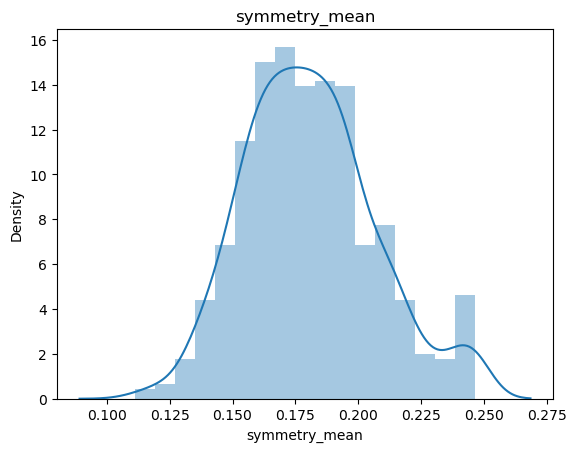

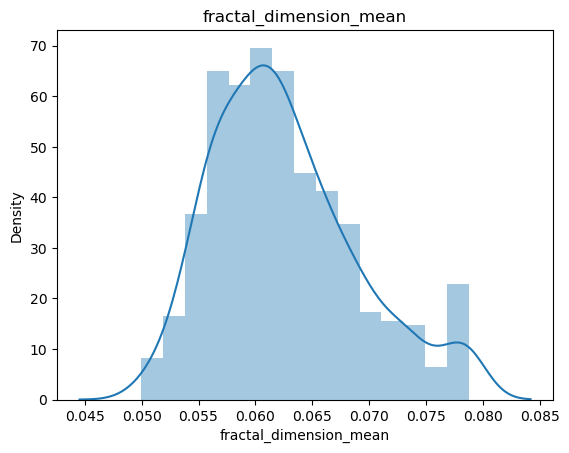

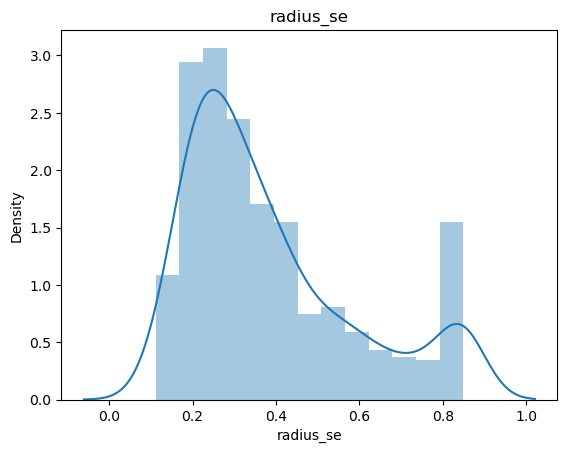

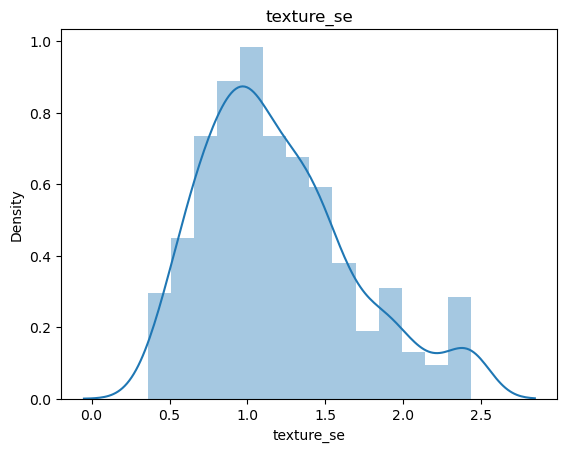

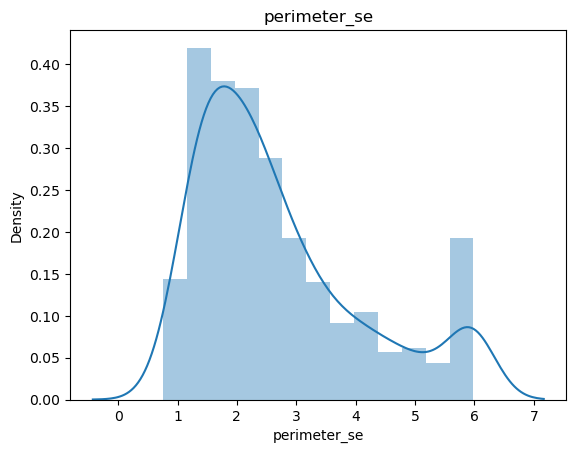

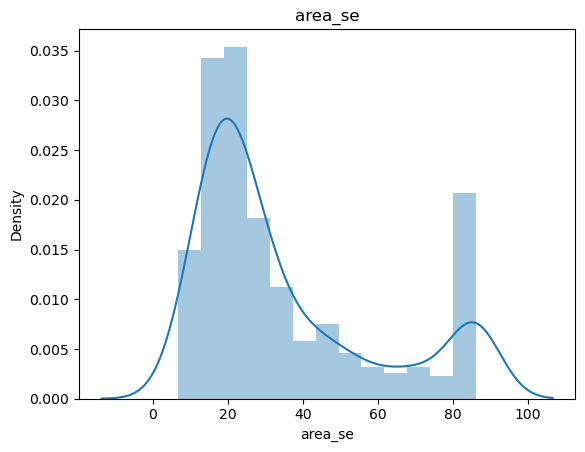

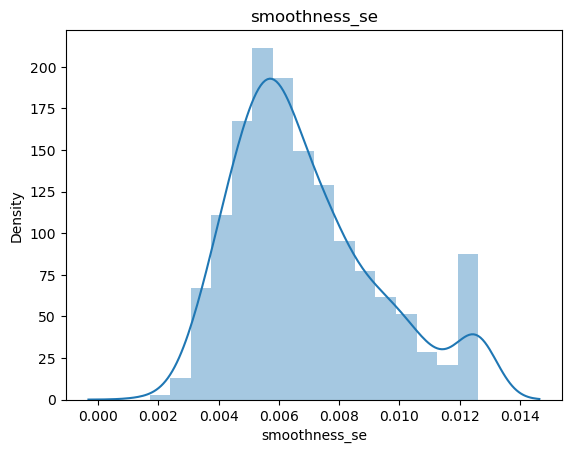

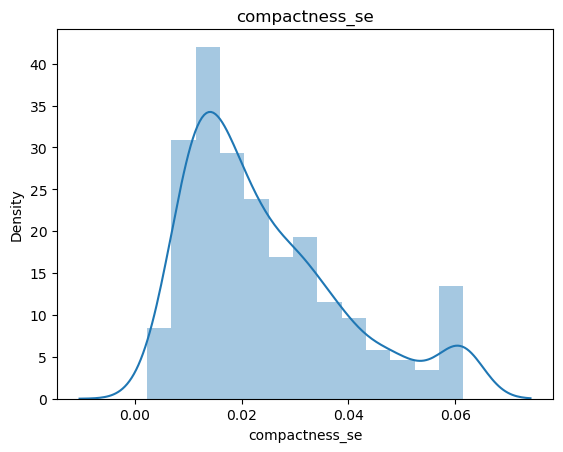

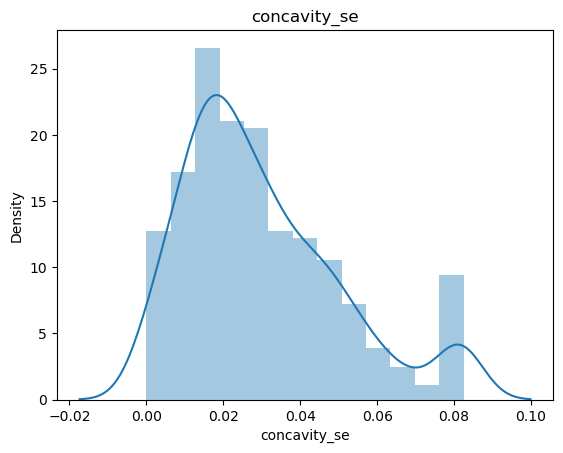

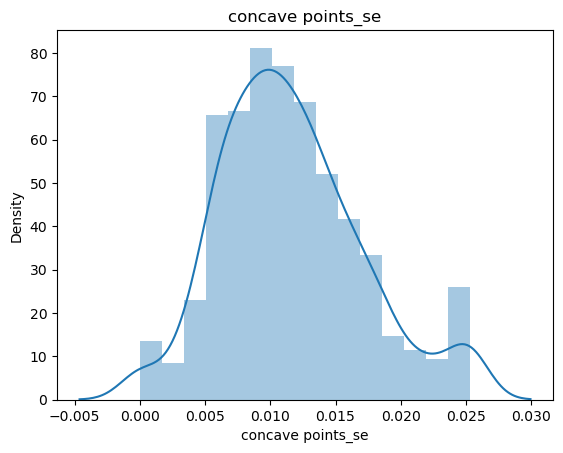

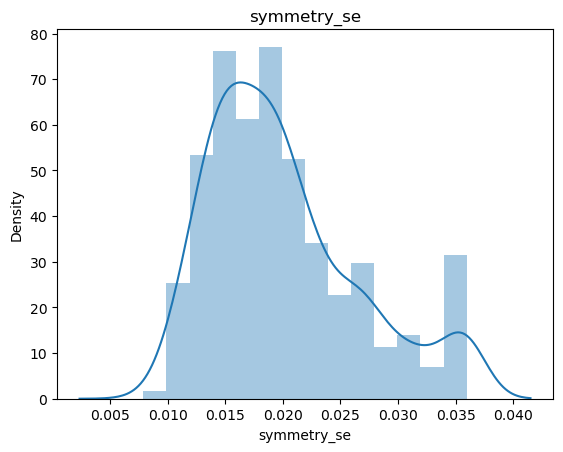

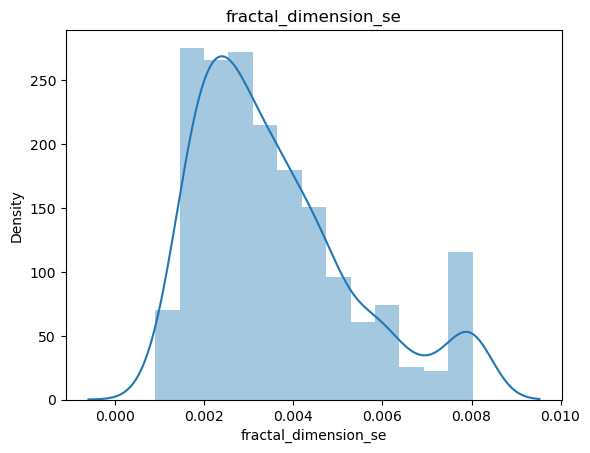

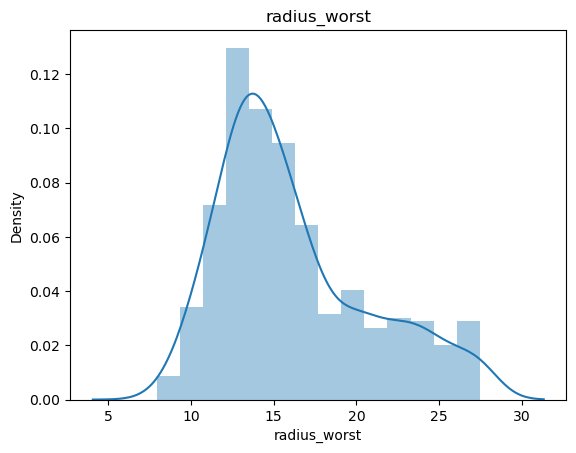

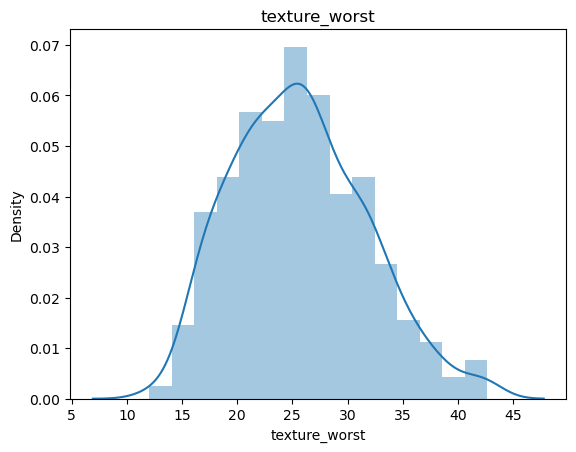

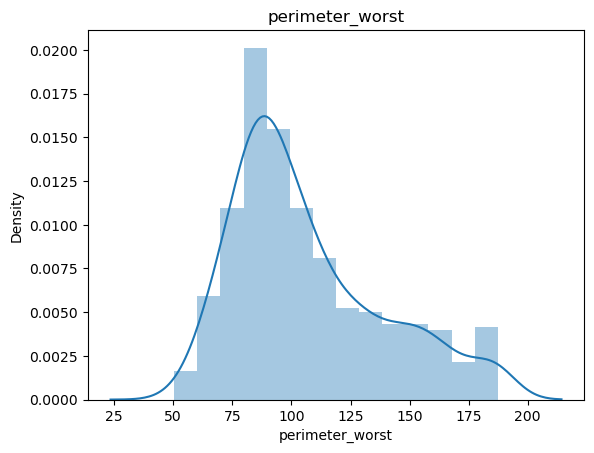

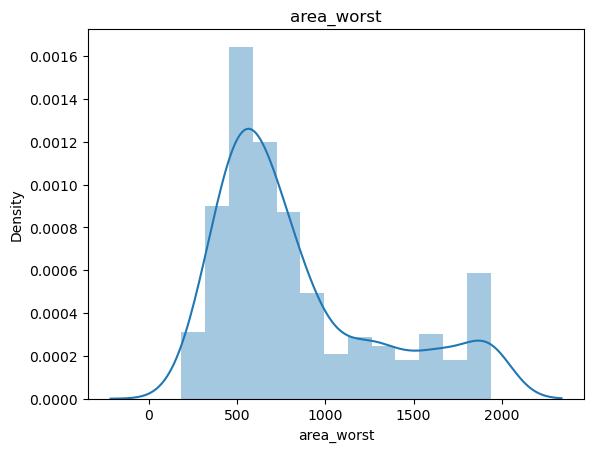

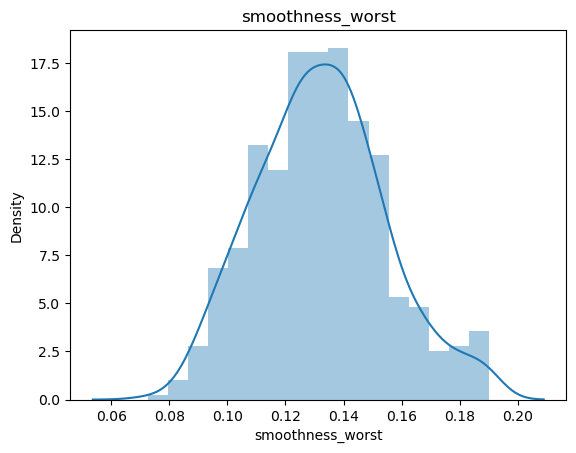

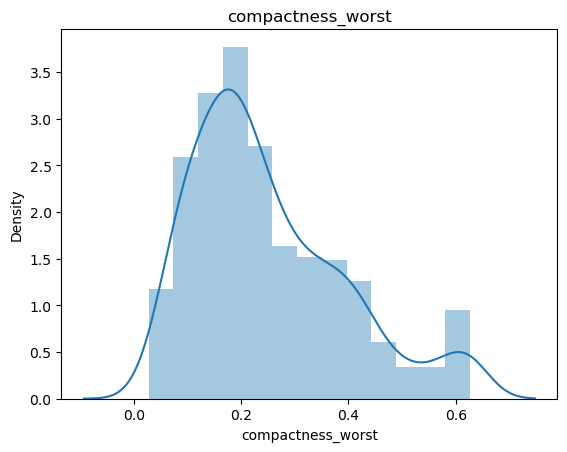

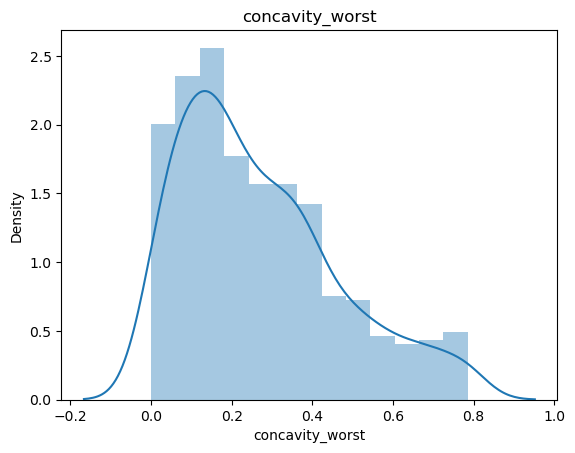

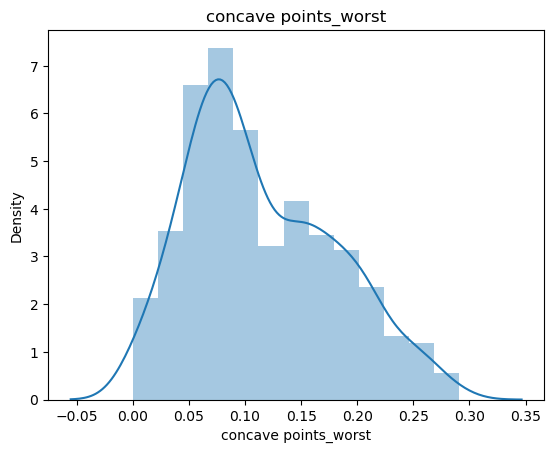

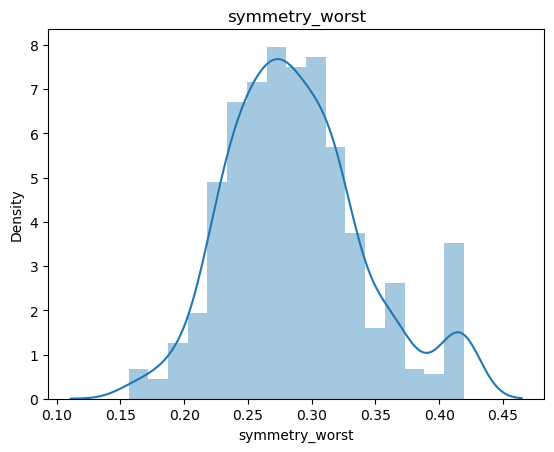

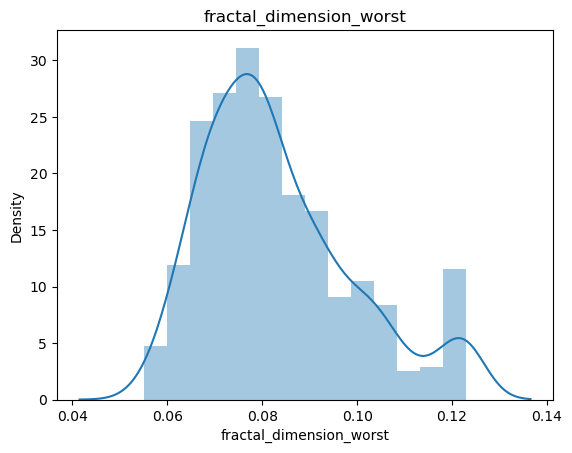

In [26]:
import warnings
warnings.filterwarnings("ignore")
for col in data.columns:
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

### Outlier  completelry remove

In [27]:
data.sample(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
267          0        13.59         21.84           87.16      561.0   
522          0        11.26         19.83           71.30      388.1   
442          0        13.78         15.79           88.37      585.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
267          0.07956           0.08259        0.040720             0.021420   
522          0.08511           0.04413        0.005067             0.005664   
442          0.08817           0.06718        0.010550             0.009937   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
267         0.1635  ...         14.80          30.04            97.66   
522         0.1637  ...         11.93          26.43            76.38   
442         0.1405  ...         15.27          17.50            97.90   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
267       661.5            0.1005            0.17300          0.14530   
522       435.9            0.1108            0.07723          0.02533   
442       706.6            0.1072            0.10710          0.03517   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
267               0.06189          0.2446                  0.07024  
522               0.02832          0.2557                  0.07613  
442               0.03312          0.1859                  0.06810  

[3 rows x 31 columns]

In [28]:
# all columns except the target column
x = data.drop("diagnosis", axis=1)

# only the target column (diagnosis)
y = data.iloc[:, 0]


In [29]:
# spliting the values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
print(x_train.shape,"\t",x_test.shape,"\n",y_train.shape,"\t",y_test.shape)

(455, 30) 	 (114, 30) 
 (455,) 	 (114,)


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# Step 1: define pipeline for numeric columns
num_pipeline = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=5, encode="ordinal",strategy="kmeans")),
    ("power", PowerTransformer()),
    ("scale", StandardScaler())
])

# Step 2: apply this pipeline to X_train numeric columns
ct = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, x_train.columns)  # apply to all numeric columns
    ],
    remainder="passthrough"
)

# Step 3: fit on training data
X_train_transformed = ct.fit_transform(x_train)
X_test_transformed = ct.transform(x_test)

  File "C:\Users\Amita\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Amita\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Amita\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Amita\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [32]:
ran = RandomForestClassifier()

In [33]:
ran.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [34]:
y_pred1 = ran.predict(X_test_transformed)

In [35]:
print("accuracy:",accuracy_score(y_test,y_pred1))
print("precision:",precision_score(y_test,y_pred1))
print("recall:",recall_score(y_test,y_pred1))
print("f1_score:",f1_score(y_test,y_pred1))
print("conf",confusion_matrix(y_test,y_pred1))
print("class_rep:",classification_report(y_test,y_pred1))

accuracy: 0.9912280701754386
precision: 0.9772727272727273
recall: 1.0
f1_score: 0.9885057471264368
conf [[70  1]
 [ 0 43]]
class_rep:               precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      1.00      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [42]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


In [ ]:
ran1 = RandomForestClassifier()

In [40]:
X = data[["radius_mean", "texture_mean"]].values

In [44]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_decision_regions(X_pca, y.values, clf=ran, legend=2)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.title("Decision Boundary (Random Forest)")
plt.show()


ValueError: y and X must contain the same number of samples. Got y: 569, X: 455

<Figure size 1000x600 with 0 Axes>